# Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

For many banks, retaining high profitable customers is the number one business goal. Banking fraud, however, poses a significant threat to this goal for different banks. In terms of substantial financial losses, trust and credibility, this is a concerning issue to both banks and customers alike. In the banking industry, credit card fraud detection using machine learning is not just a trend but a necessity for them to put proactive monitoring and fraud prevention mechanisms in place. Machine learning is helping these institutions to reduce time-consuming manual reviews, costly chargebacks and fees, and denials of legitimate transactions.

Credit card fraud is any dishonest act and behaviour to obtain information without the proper authorization from the account holder for financial gain. Among different ways of frauds, Skimming is the most common one, which is the way of duplicating of information located on the magnetic strip of the card. Apart from this, the other ways are:

- Manipulation/alteration of genuine cards
- Creation of counterfeit cards
- Stolen/lost credit cards
- Fraudulent telemarketing

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

In [2]:
#Importing model building packages

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score, classification_report

import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive
drive._mount('/content/drive')

Mounted at /content/drive


In [4]:
!unzip /content/drive/MyDrive/creditcard.csv.zip

Archive:  /content/drive/MyDrive/creditcard.csv.zip
  inflating: creditcard.csv          


## Exploratory data analysis

In [5]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.shape

(284807, 31)

In [7]:
#observe the different feature type present in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
# Checking for the missing value present in each columns
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,Class,V14,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V15,Amount,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Time
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- We can see that there is no missing value present in the dataframe.

In [9]:
#checking the statistical view of the dataset provided 
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [10]:
# Checking the distribution of the class
from collections import Counter
target = df.values[:,-1]
counter = Counter(target)
for k,v in counter.items():
	print('Class=%d, Count=%d' % (k, v))

Class=0, Count=284315
Class=1, Count=492


We can see that data is highly imbalanced as the ratio of Non Fraud to Fraud case is extremely high. As only 492 are fraud case and 284315 is non fraud case

Here we will observe the distribution of our classes

In [11]:
# Checking the percentage of the class
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

print(normal_share)
print(fraud_share)

99.82725143693798
0.1727485630620034


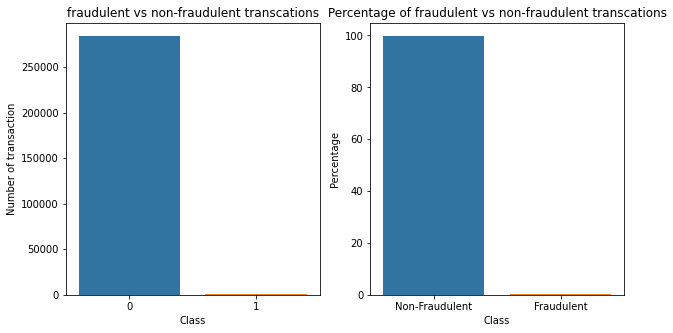

In [12]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(df["Class"])
plt.ylabel("Number of transaction")
plt.xlabel("Class")
plt.title("fraudulent vs non-fraudulent transcations")

plt.subplot(1,2,2)
fraud_percentage = {'Class':['Non-Fraudulent', 'Fraudulent'], 'Percentage':[normal_share, fraud_share]} 
df_fraud_percentage = pd.DataFrame(fraud_percentage) 
sns.barplot(x='Class',y='Percentage', data=df_fraud_percentage)
plt.title('Percentage of fraudulent vs non-fraudulent transcations')

plt.show()

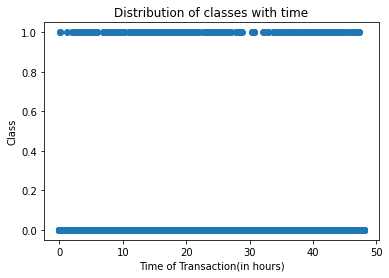

In [13]:
# Create a scatter plot to observe the distribution of classes with time
plt.scatter(df['Time']/(60*60),df['Class'])
plt.title('Distribution of classes with time')
plt.xlabel('Time of Transaction(in hours)')
plt.ylabel('Class')
plt.show()

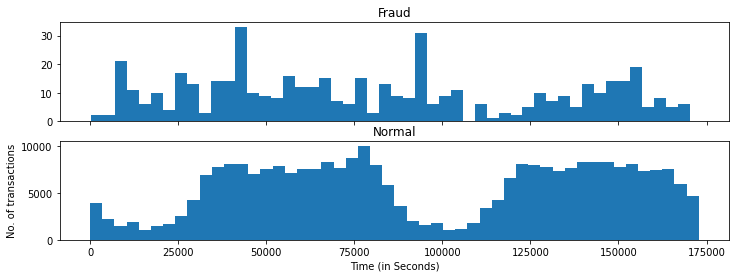

In [14]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))
bins = 50
ax1.hist(df.Time[df.Class == 1], bins = bins)
ax1.set_title('Fraud')
ax2.hist(df.Time[df.Class == 0], bins = bins)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('No. of transactions')
plt.show()

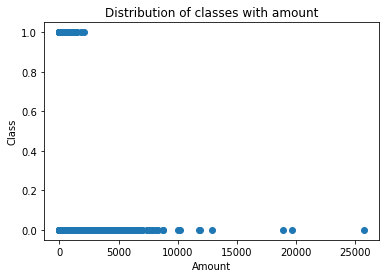

In [15]:
# Create a scatter plot to observe the distribution of classes with Amount
plt.scatter(df['Amount'],df['Class'])
plt.title('Distribution of classes with amount')
plt.xlabel('Amount')
plt.ylabel('Class')
plt.show()

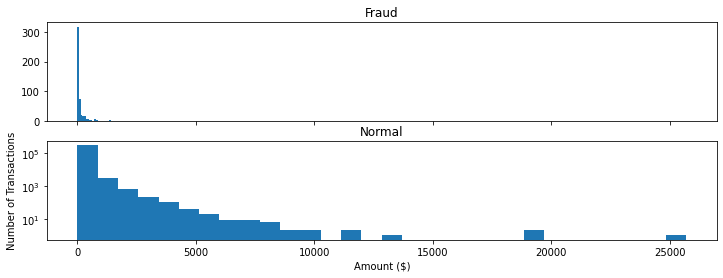

In [16]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 30

ax1.hist(df.Amount[df.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df.Amount[df.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()


In [17]:
# correlation table to check the correlation for the variable with others
df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,3.061663e-02,-2.476894e-01,1.243481e-01,-6.590202e-02,-9.875682e-02,-1.834533e-01,1.190287e-02,-7.329721e-02,9.043813e-02,2.897530e-02,-5.086602e-02,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.697350e-17,-1.424390e-15,1.755316e-17,6.391162e-17,2.398071e-16,1.991550e-15,-9.490675e-17,2.169581e-16,7.433820e-17,2.438580e-16,2.422086e-16,-2.115458e-16,9.352582e-16,-3.252451e-16,6.308789e-16,-5.011524e-16,2.870125e-16,1.818128e-16,1.036959e-16,-1.755072e-16,7.477367e-17,9.808705e-16,7.354269e-17,-9.805358e-16,-8.621897e-17,3.208233e-17,9.820892e-16,-0.227709,-0.101347
V2,-0.010593,4.697350e-17,1.000000e+00,2.512175e-16,-1.126388e-16,-2.039868e-16,5.024680e-16,3.966486e-16,-4.413984e-17,-5.728718e-17,-4.782388e-16,9.468995e-16,-6.588252e-16,3.854521e-16,-2.541036e-16,2.831060e-16,4.934097e-17,-9.883008e-16,2.636654e-16,9.528280e-17,-9.309954e-16,8.444409e-17,2.500830e-16,1.059562e-16,-8.142354e-18,-4.261894e-17,2.601622e-16,-4.478472e-16,-3.676415e-16,-0.531409,0.091289
V3,-0.419618,-1.424390e-15,2.512175e-16,1.000000e+00,-3.416910e-16,-1.436514e-15,1.431581e-15,2.168574e-15,3.433113e-16,-4.233770e-16,6.289267e-16,-5.501758e-17,2.206522e-16,-6.883375e-16,4.271336e-16,1.122756e-16,1.183364e-15,4.576619e-17,5.427965e-16,2.576773e-16,-9.429297e-16,-2.971969e-17,4.648259e-16,2.115206e-17,-9.351637e-17,4.771164e-16,6.521501e-16,6.239832e-16,7.726948e-16,-0.210880,-0.192961
V4,-0.105260,1.755316e-17,-1.126388e-16,-3.416910e-16,1.000000e+00,-1.940929e-15,-2.712659e-16,1.556330e-16,5.195643e-16,3.859585e-16,6.055490e-16,-2.083600e-16,-5.657963e-16,-1.506129e-16,-8.522435e-17,-1.507718e-16,-6.939204e-16,-4.397925e-16,1.493667e-16,-2.656938e-16,-3.223123e-16,-9.976950e-17,2.099922e-16,6.002528e-17,2.229738e-16,5.394585e-16,-6.179751e-16,-6.403423e-17,-5.863664e-17,0.098732,0.133447
V5,0.173072,6.391162e-17,-2.039868e-16,-1.436514e-15,-1.940929e-15,1.000000e+00,7.926364e-16,-4.209851e-16,7.589187e-16,4.205206e-16,-6.601716e-16,7.342759e-16,3.761033e-16,-9.578659e-16,-3.634803e-16,-5.132620e-16,-3.517076e-16,1.425729e-16,1.109525e-15,-3.138234e-16,2.076048e-16,-1.368701e-16,5.060029e-16,1.637596e-16,-9.286095e-16,5.625102e-16,9.144690e-16,4.465960e-16,-3.299167e-16,-0.386356,-0.094974
V6,-0.063016,2.398071e-16,5.024680e-16,1.431581e-15,-2.712659e-16,7.926364e-16,1.000000e+00,1.429426e-16,-1.707421e-16,1.114447e-16,2.850776e-16,4.865799e-16,2.140589e-16,-2.268061e-16,3.452801e-16,-6.368111e-18,-2.477917e-16,3.567582e-16,2.811474e-16,2.717167e-16,1.898638e-16,-1.575903e-16,-3.362902e-16,-7.232186e-17,-1.261867e-15,1.081933e-15,-2.378414e-16,-2.623818e-16,4.813155e-16,0.215981,-0.043643
V7,0.084714,1.991550e-15,3.966486e-16,2.168574e-15,1.556330e-16,-4.209851e-16,1.429426e-16,1.000000e+00,-8.691834e-17,7.933251e-16,3.043333e-17,-1.084105e-15,1.510045e-15,-9.892325e-17,-1.729462e-16,1.936832e-17,2.893672e-16,1.149692e-15,-1.116789e-16,-2.874017e-16,1.744242e-16,1.938604e-16,-1.058131e-15,2.327911e-16,-2.589727e-17,1.174169e-15,-7.334507e-16,-5.886825e-16,-6.836764e-17,0.397311,-0.187257
V8,-0.036949,-9.490675e-17,-4.413984e-17,3.433113e-16,5.195643e-16,7.589187e-16,-1.707421e-16,-8.691834e-17,1.000000e+00,2.900829e-16,9.051847e-17,1.954747e-16,-6.266057e-17,-2.382948e-16,-1.131098e-16,2.021491e-16,5.027192e-16,-3.508777e-16,-4.093852e-16,-5.339821e-16,-1.095534e-16,-2.412439e-16,5.475559e-16,3.897104e-16,-1.802967e-16,-1.390791e-16,-1.209975e-16,1.733633e-16,-4.484325e-16,-0.103079,0.019875
V9,-0.008660,2.169581e-16,-5.728718e-17,-4.233770e-16,3.859585e-16,4.205206e-16,1.114447e-16,7.933251e-16,2.900829e-16,1.000000e+00,-2.771761e-16,4.682341e-16,-2.445230e-15,-2.650351e-16,2.343317e-

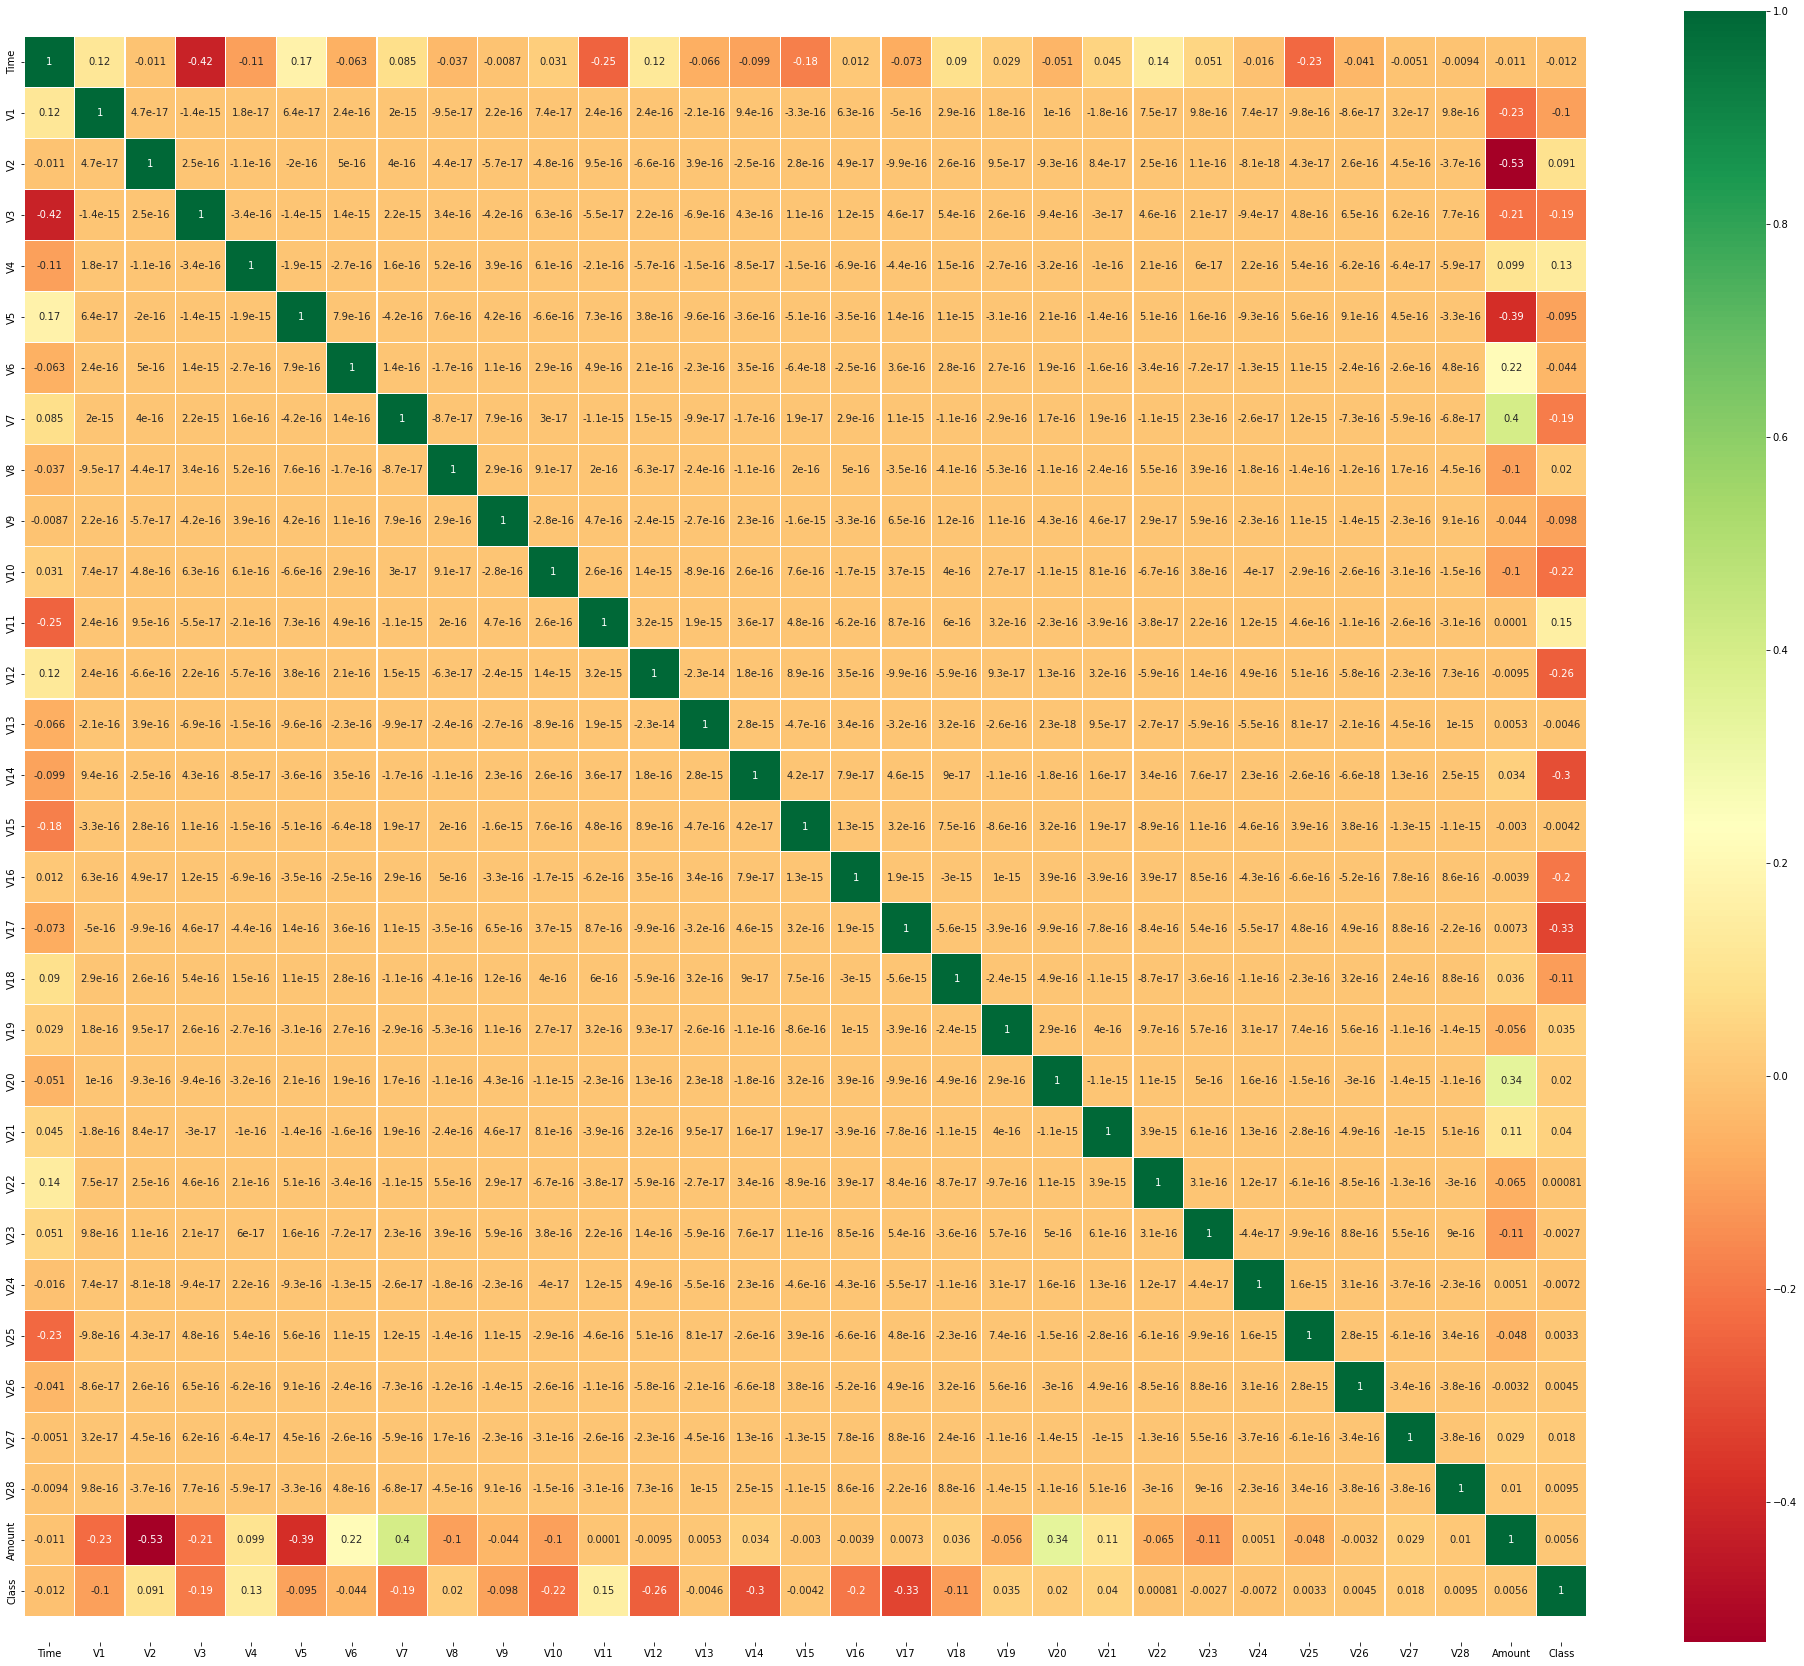

In [18]:
# Heatmap to check correlatoin between the variables 
fig, ax = plt.subplots() 
fig.set_size_inches(35, 30) 
sns.heatmap(df.corr(),cmap ="RdYlGn",linewidths = 0.1, annot = True)
top, bottom = ax.get_ylim()
ax.set_ylim(top+0.5, bottom-0.5)
plt.show()

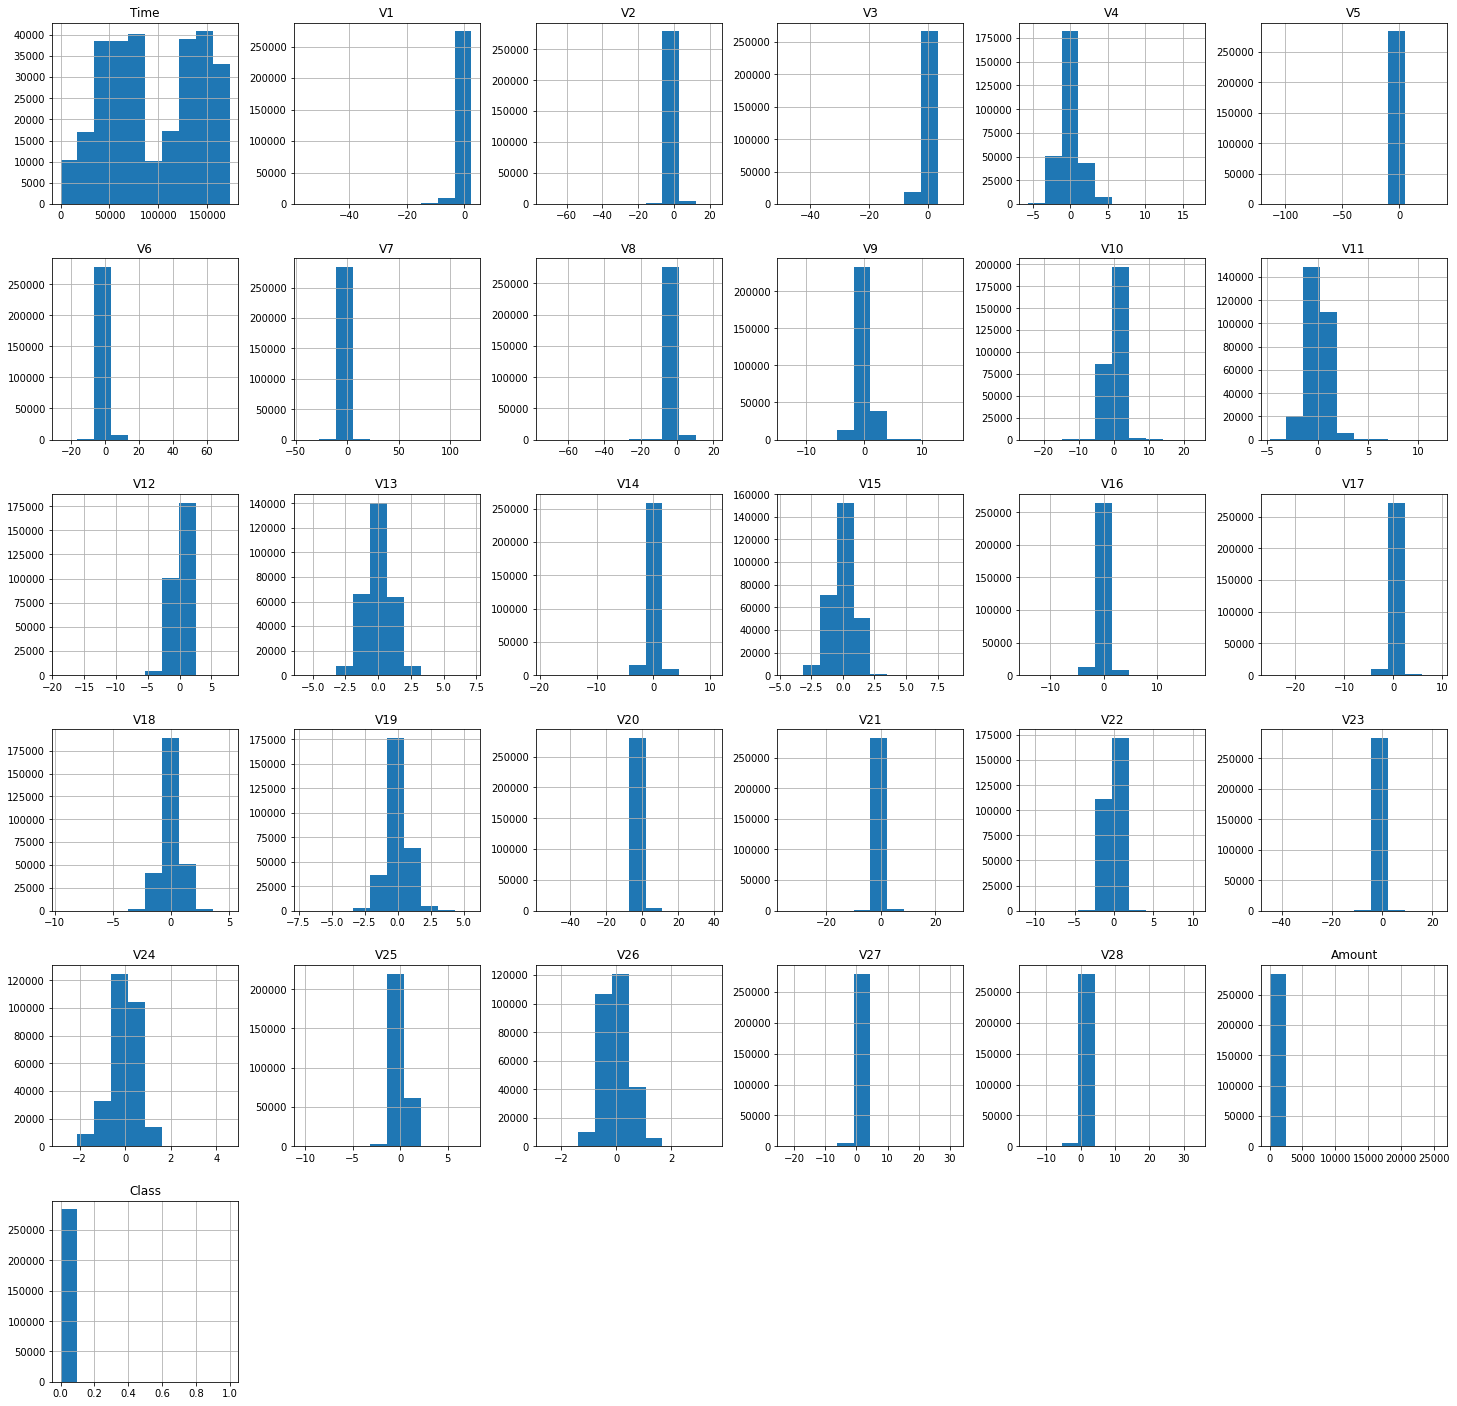

In [19]:
# histogram 
df.hist(figsize = (25, 25))
plt.show()

**Inferences**

- We can see low amount transactions are more likely to be fraudulent than higher amount transaction.

In [20]:
# Drop unnecessary columns
#  We will drop the Time variable since the distribution is similar for fraud and non-fraud classes. The time variable does not seem to have any relationship with the target variable. 
df.drop(["Time"],axis=1,inplace=True)

In [21]:
#checking the columns after dropping the features
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

<Figure size 432x288 with 0 Axes>

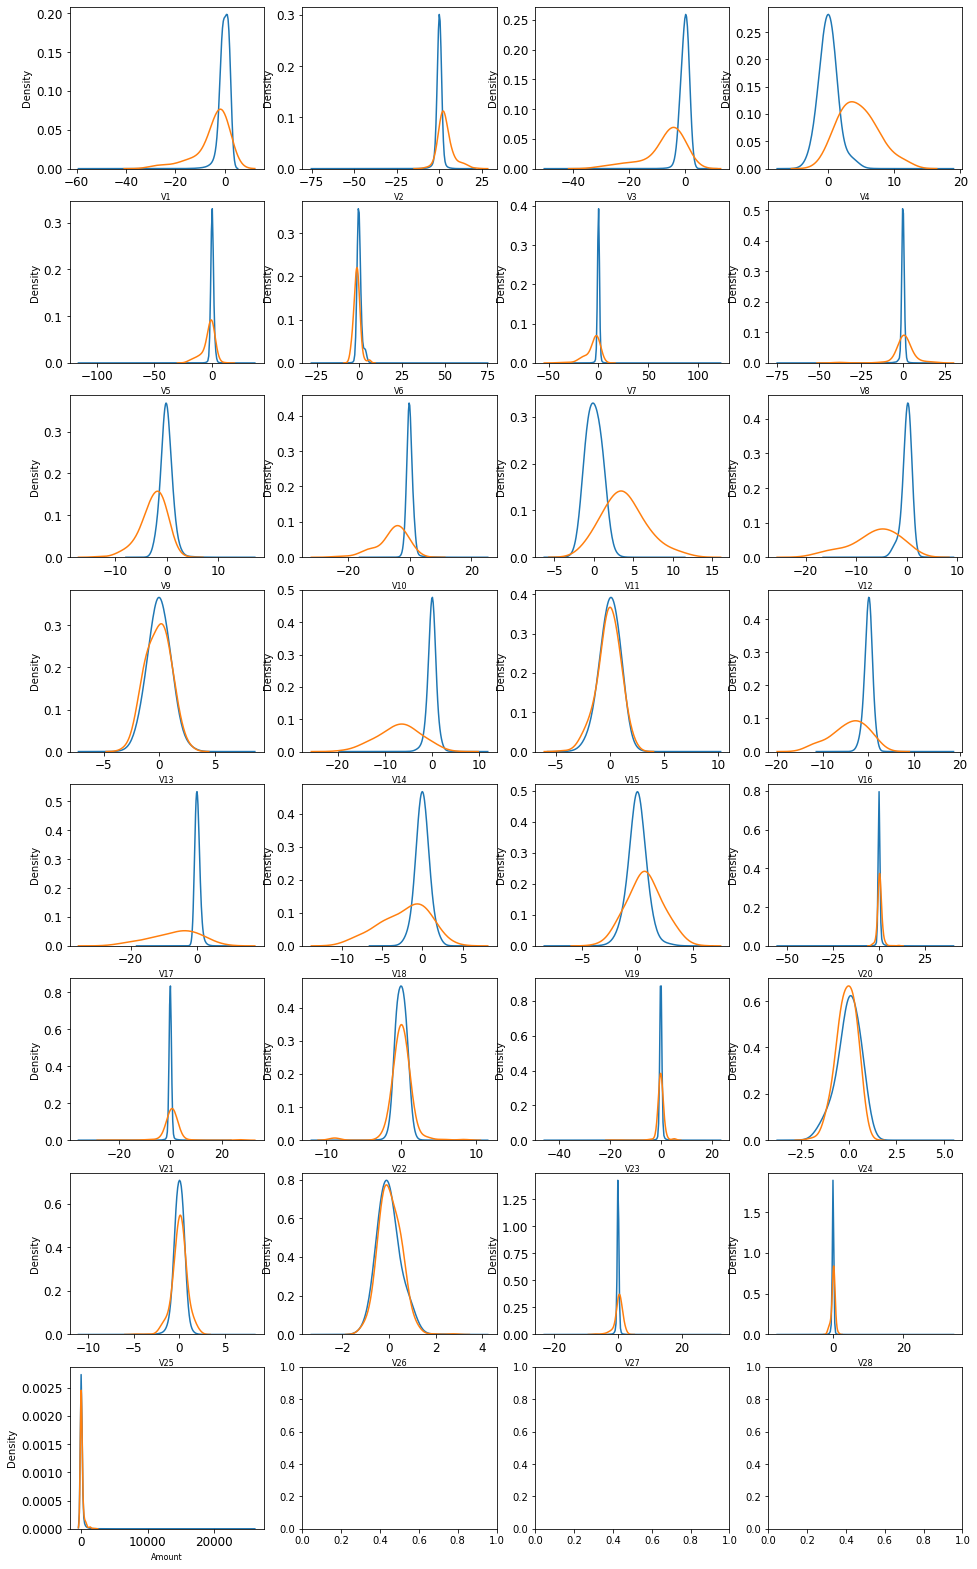

In [22]:
# Displot to visualise the distribution
cols = list(df.columns.values)

# removing "class" column
cols.remove("Class")

i = 0

# Dataframe based on the class
t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]

plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))
for feature in cols:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="0")
    sns.kdeplot(t1[feature], bw=0.5,label="1")
    plt.xlabel(feature, fontsize=8)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

- we can see distributions are overlapping for both the fraud and non-fraud transactions.

### Data Scaling

In [23]:
# As PCA is already performed on the datasetn so we are scaling Amount field
from sklearn.preprocessing import StandardScaler

std_scalar = StandardScaler()

df['scaled_amount'] = std_scalar.fit_transform(df['Amount'].values.reshape(-1,1))

In [24]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,-0.073403


In [25]:
df.drop('Amount',axis=1,inplace=True)

In [26]:
df.rename(columns={'scaled_amount':'Amount'},inplace=True)

In [27]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


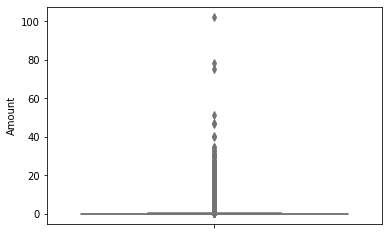

In [28]:
#Outliers analysis
sns.boxplot(y=df['Amount'], palette = 'rainbow')

plt.show()

- We will not remove outliers as of now since every variable has a huge distribution length including Amount. We do not want to modify V1 to V28 variables since they are not known to us and we do not want to modify any data there.

### Splitting the data into train & test data

In [29]:
y= df['Class']#class variable
X=df.drop("Class",axis=1)

In [30]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [31]:
#Print the class distribution
print(np.sum(y)) # original class 1
print(np.sum(y_train)) # number of class 1 in train set
print(np.sum(y_test)) # number of class 1 in test set

492
350
142


### Plotting the distribution of a variable

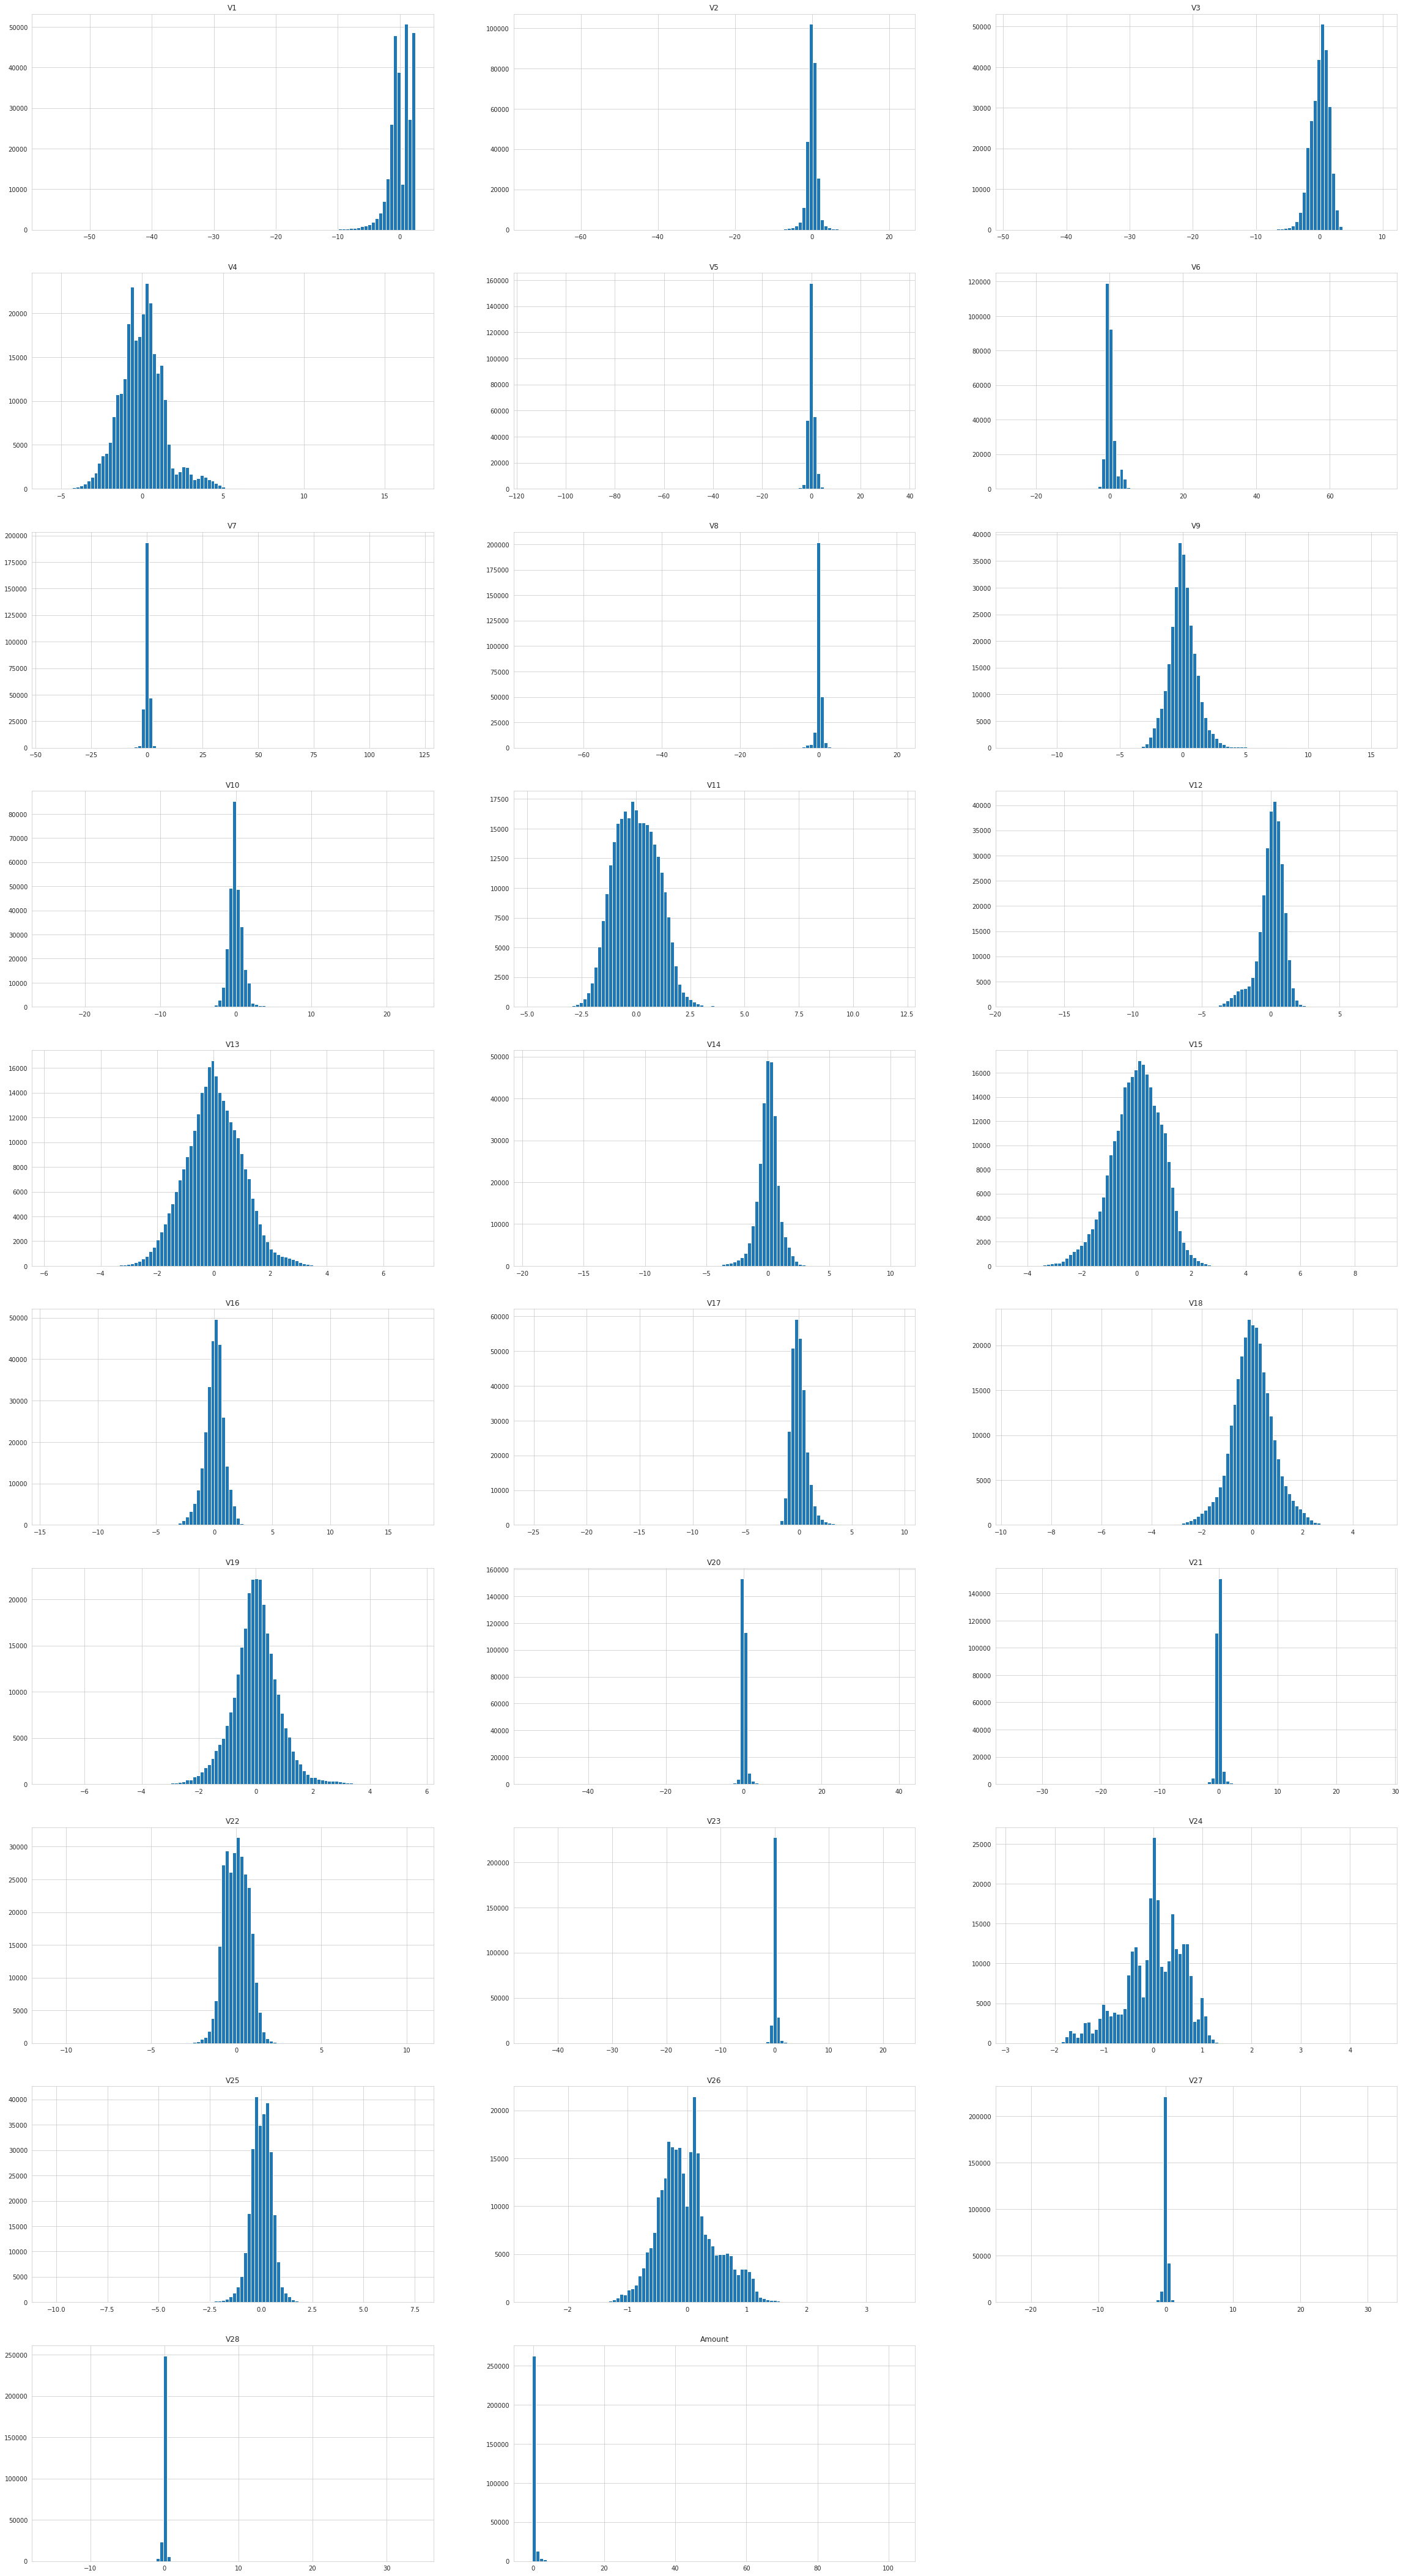

In [32]:
# plot the histogram of a variable from the dataset to see the skewness
sns.set_style('whitegrid')
cols= X.columns
plt.figure(figsize=(40,100))
for i in range(len(cols)):
    plt.subplot(13,3,i+1)
    plt.hist(X[cols[i]],bins=100)
    plt.title(cols[i])
plt.show()    

- Since there is skewness present in the distribution,we will transform the data to make it more normally distributed.

### There is skewness present in the distribution of the above features use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [33]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
pt = preprocessing.PowerTransformer(copy=False)

In [34]:
# Fitting the power transformer in train data
pt.fit_transform(X_train)

array([[ 0.59847004, -0.07663472,  0.41436418, ..., -0.18048148,
        -0.02782542, -1.06668491],
       [ 1.44556451, -0.13437333, -0.90268967, ..., -0.2060558 ,
        -0.22088604, -1.02971402],
       [ 0.84304949, -0.98741143, -0.65297019, ...,  0.09939728,
         0.10789915,  0.70088678],
       ...,
       [-1.08183925, -0.41771323, -0.33444227, ..., -0.61867143,
         0.23464063,  2.04172157],
       [-0.46037622,  0.58231303,  0.03161119, ..., -0.73313856,
         0.06488077, -1.004819  ],
       [ 0.16855185, -0.62610289,  0.85576608, ...,  0.1228928 ,
         0.23395345,  1.74477917]])

In [35]:
# Transforming the test data
pt.transform(X_test)

array([[ 0.65868887, -0.23327558, -0.5608948 , ...,  0.13237704,
         0.06713176, -1.004819  ],
       [ 1.40742355, -0.14081654, -1.74859321, ..., -0.14738456,
        -0.12302681, -0.83233647],
       [ 0.09662144, -0.93897071,  0.53153202, ..., -0.23461413,
         0.17389761,  1.86815254],
       ...,
       [-1.6272232 , -0.72991207,  0.30339367, ...,  1.79570829,
         0.83532569,  1.93543915],
       [-0.10017992,  0.69444611,  0.02021457, ..., -0.02658043,
         0.03453504, -1.04725153],
       [ 1.30344261, -0.73791418, -1.29304509, ..., -0.09919904,
        -0.13758938,  0.67000874]])

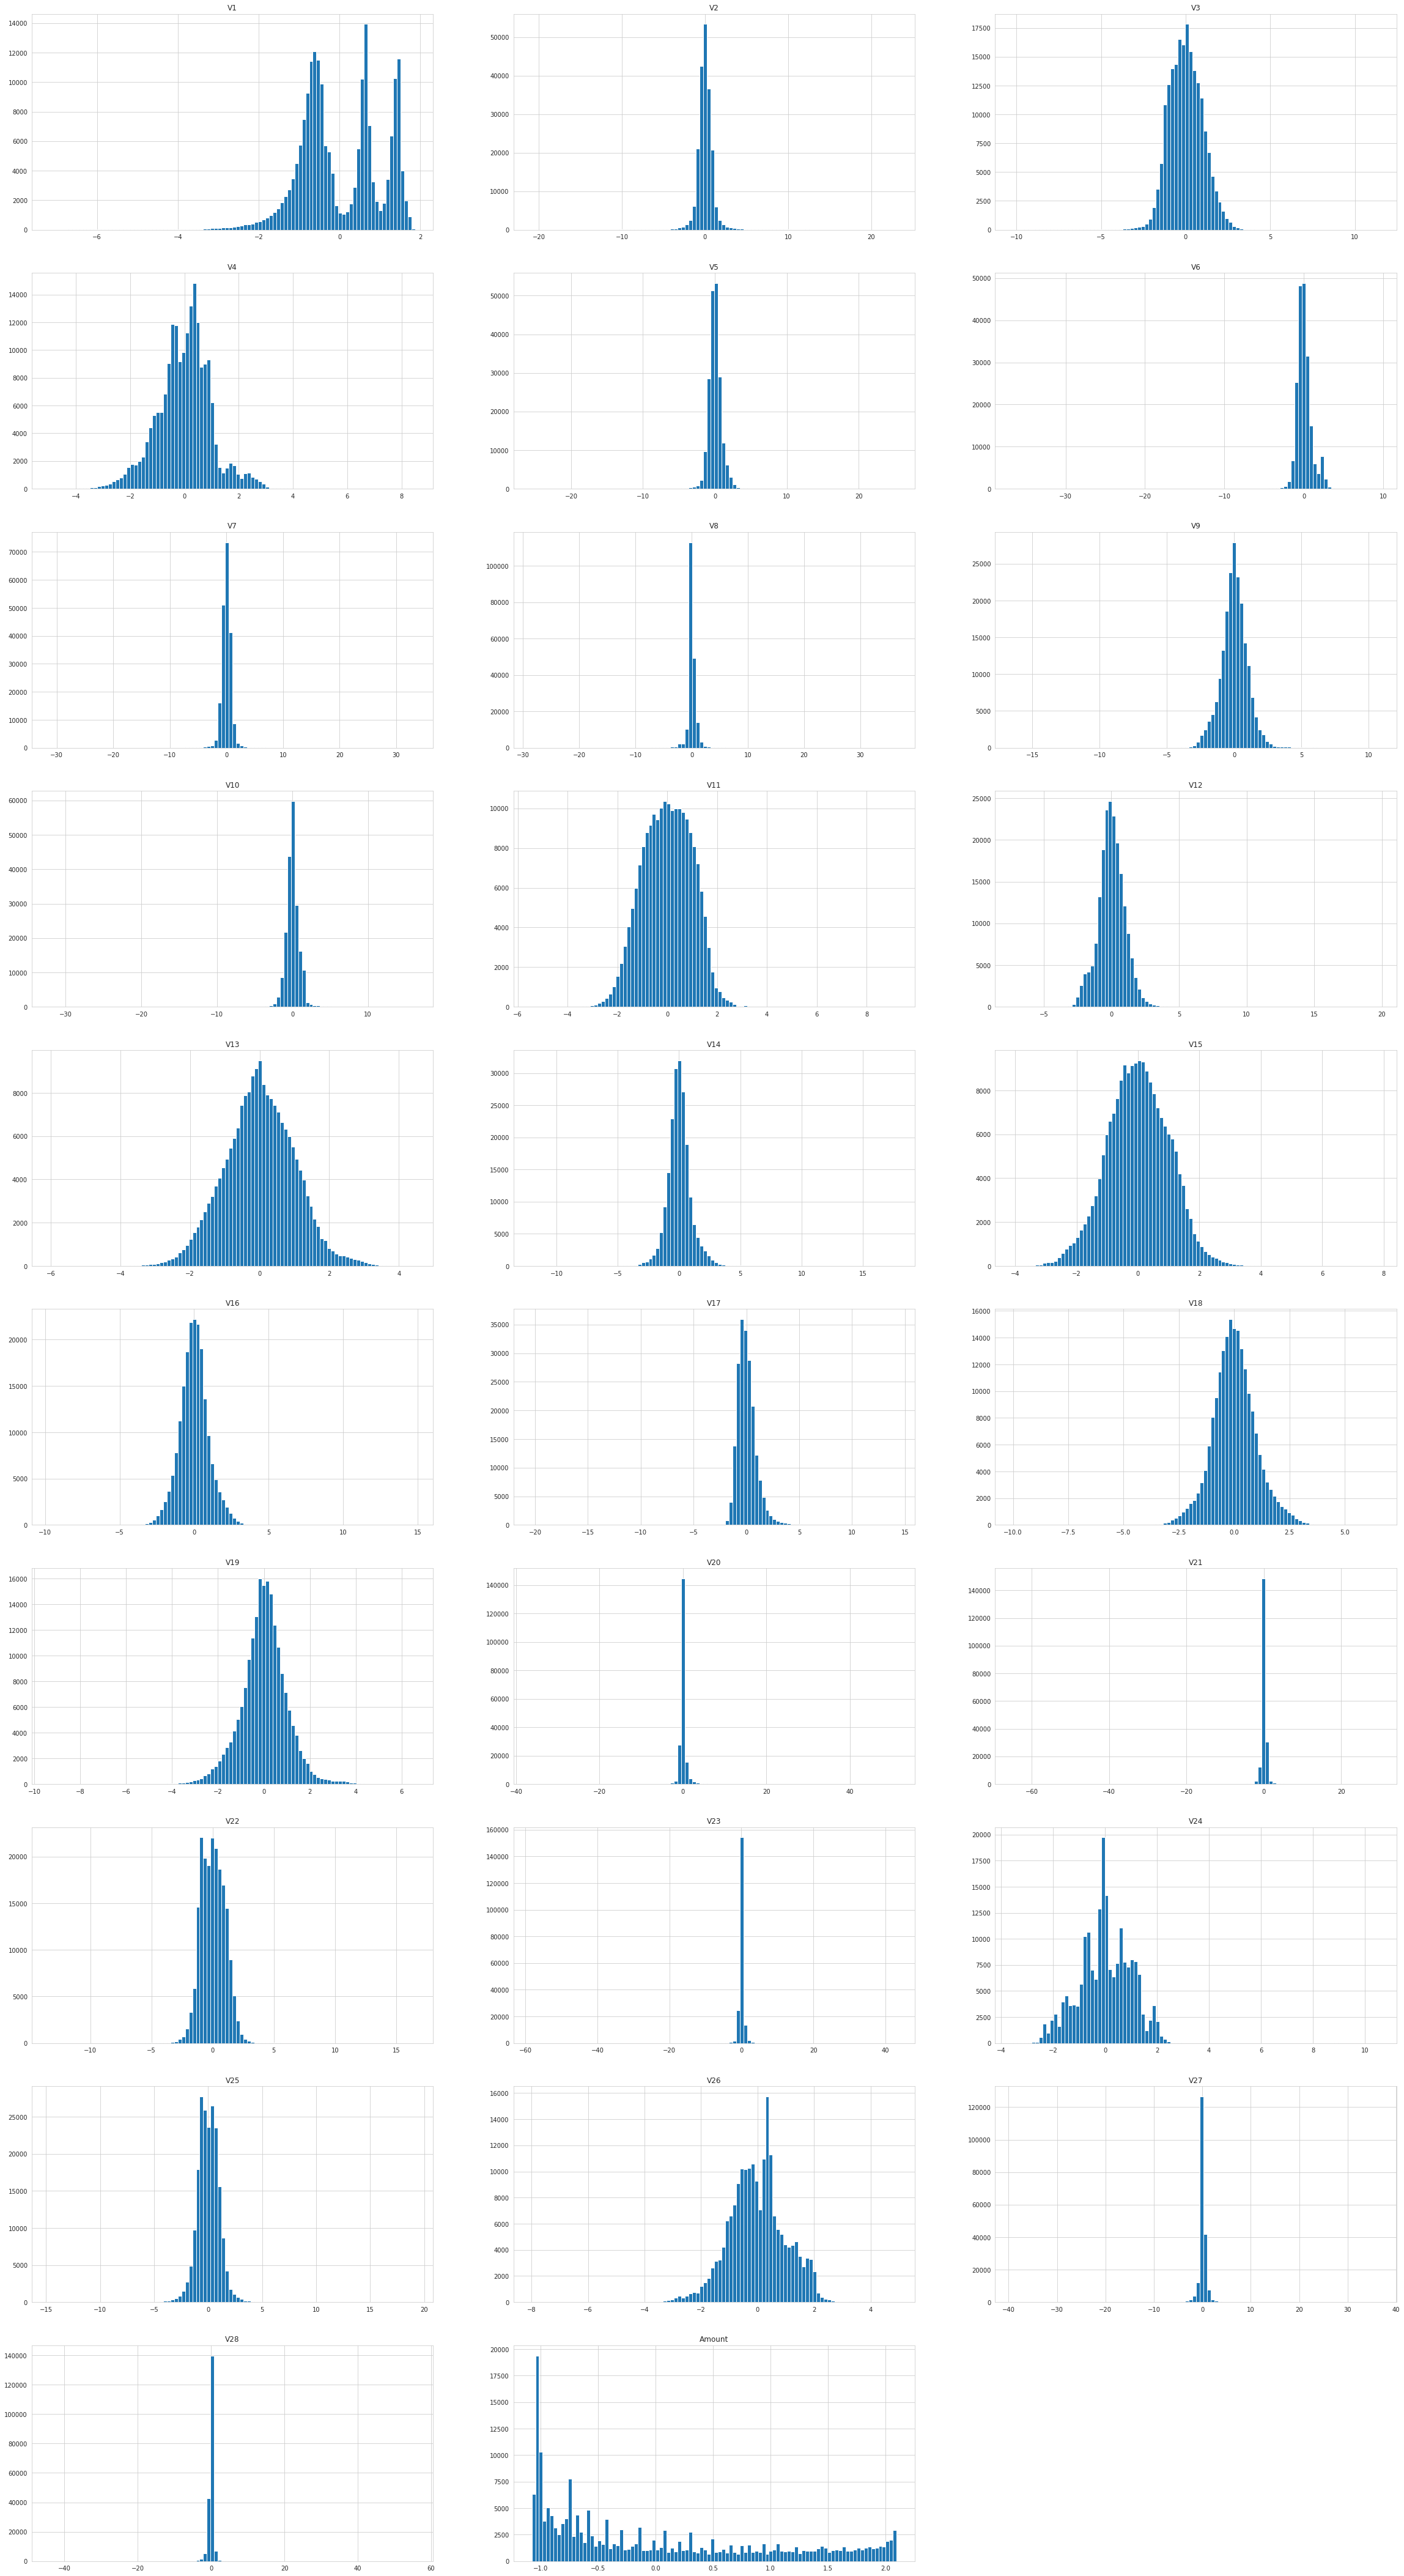

In [36]:
# plot the histogram of a variable from the dataset again to see the result 
cols= X_train.columns
plt.figure(figsize=(40,100))
for i in range(len(cols)):
    plt.subplot(13,3,i+1)
    plt.hist(X_train[cols[i]],bins=100)
    plt.title(cols[i])

## Model Building
- Build different models on the imbalanced dataset and see the result

### Logistic Regression

In [37]:
# Logistic Regression
from sklearn import linear_model #import the package
from sklearn.model_selection import KFold

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

#num_C = ______  #--> list of values
#cv_num =   #--> list of values

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

In [38]:
#perform cross validation

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters

In [39]:
# Logistic Regression parameters for K-fold cross vaidation
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}
folds = KFold(n_splits=5, shuffle=True, random_state=4)


#perform cross validation
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True) 
#perform hyperparameter tuning
model_cv.fit(X_train, y_train)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   30.2s finished


Best ROC AUC score:  0.9847578709896656
Best hyperparameters:  {'C': 0.01}


In [40]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.242392,0.101976,0.023946,0.001209,0.01,{'C': 0.01},0.986938,0.975927,0.985079,0.996215,0.979630,0.984758,0.006934,1,0.985821,0.987951,0.986686,0.984527,0.988653,0.986728,0.001475
1,1.706818,0.081604,0.024986,0.000744,0.1,{'C': 0.1},0.985707,0.971570,0.985197,0.994665,0.976785,0.982785,0.007966,2,0.983813,0.986618,0.984654,0.983411,0.987622,0.985223,0.001631
2,1.896044,0.113877,0.024746,0.001213,1,{'C': 1},0.984749,0.970160,0.984861,0.993937,0.975719,0.981885,0.008220,3,0.982968,0.985809,0.983724,0.982646,0.986925,0.984414,0.001670
3,1.881448,0.082498,0.024360,0.001505,10,{'C': 10},0.984615,0.969984,0.984807,0.993837,0.975590,0.981767,0.008247,4,0.982857,0.985704,0.983609,0.982546,0.986830,0.984309,0.001674
4,1.949997,0.094204,0.024915,0.001595,100,{'C': 100},0.984601,0.969969,0.984802,0.993828,0.975573,0.981754,0.008249,5,0.982846,0.985693,0.983597,0.982536,0.986820,0.984298,0.001674
5,1.881985,0.153638,0.023037,0.004408,1000,{'C': 1000},0.984599,0.969968,0.984802,0.993827,0.975571,0.981753,0.008250,6,0.982844,0.985692,0.983596,0.982535,0.986819,0.984297,0.001674


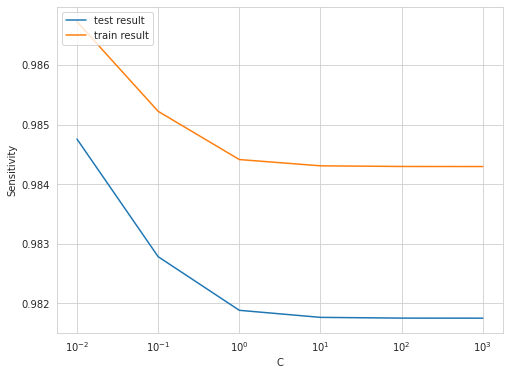

In [41]:
# plot of C versus train and validation scores
plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

##### Logistic Regression with Optimal C

In [42]:
# model with C param
log_reg_imb_model = LogisticRegression(C=0.01)

# train dataset
log_reg_imb_model.fit(X_train, y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

##### Prediction and Evaluation on Train set

In [43]:
# Method to show ROC-AUC score, f1 score
def display_scores(y_test, y_pred):
    print(f"F1 Score: {round(f1_score(y_test, y_pred)*100,2)}%") 
    print(f"Classification Report: \n {classification_report(y_test, y_pred)}")

In [44]:
# Predictions
y_train_pred = log_reg_imb_model.predict(X_train)

In [45]:
#creating the confusion matrix
cm_train_lr = metrics.confusion_matrix(y_train, y_train_pred)
cm_train_lr

array([[198994,     20],
       [   122,    228]])

In [46]:
#Display f1 score and classification report of a model
display_scores(y_train, y_train_pred)

F1 Score: 76.25%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199014
           1       0.92      0.65      0.76       350

    accuracy                           1.00    199364
   macro avg       0.96      0.83      0.88    199364
weighted avg       1.00      1.00      1.00    199364



In [47]:
# ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None

In [48]:
# Predicted probability
y_train_pred_proba = log_reg_imb_model.predict_proba(X_train)[:,1]

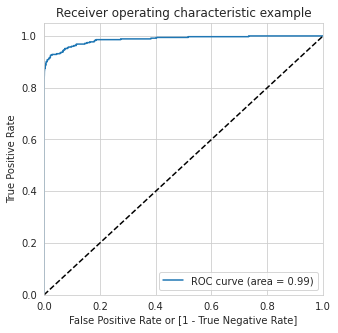

In [49]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

##### Evaluating the Model on Test set

In [50]:
# Making prediction on the test set
y_test_pred = log_reg_imb_model.predict(X_test)

In [51]:
#Confusion matrix
cm_test_lr = metrics.confusion_matrix(y_test, y_test_pred)
cm_test_lr

array([[85281,    20],
       [   53,    89]])

In [52]:
#Display f1 score and classification report of a model
display_scores(y_test, y_test_pred)

F1 Score: 70.92%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.82      0.63      0.71       142

    accuracy                           1.00     85443
   macro avg       0.91      0.81      0.85     85443
weighted avg       1.00      1.00      1.00     85443



In [53]:
# Predicted probability
y_test_pred_proba = log_reg_imb_model.predict_proba(X_test)[:,1]

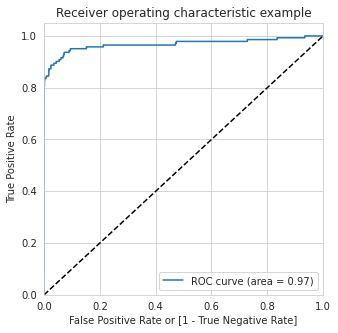

In [54]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

- We can see very good ROC on the test data set 0.97

**Model Summery**

Train Set
- ROC : 99%
- F1 score : 76.25%

Test Set
- ROC : 97%
- F1 score : 70.92%

### Similarly explore other algorithms by building models like:
- KNN
- Decision Tree
- Random Forest
- XGBoost

### Model building using K-Nearest Neighbors(KNN)

In [55]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef,classification_report,roc_curve

In [56]:
model_knn = KNeighborsClassifier(n_neighbors=12)
model_knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='uniform')

In [57]:
# Try KNN to see how well it predicts fraud on the dataset
pred= model_knn.predict(X_test)

[[85276    25]
 [   39   103]]


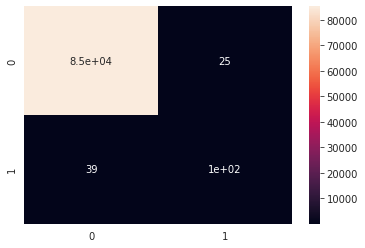

In [58]:
print(confusion_matrix(y_test,pred))

sns.heatmap(confusion_matrix(y_test,pred), annot=True)

In [59]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.80      0.73      0.76       142

    accuracy                           1.00     85443
   macro avg       0.90      0.86      0.88     85443
weighted avg       1.00      1.00      1.00     85443



In [60]:
print("Accuracy -->",accuracy_score(y_test,pred))
print("Precison -->",precision_score(y_test,pred))
print("Recall -->",recall_score(y_test,pred))
print("F1 -->",f1_score(y_test,pred))
print("MCC -->",matthews_corrcoef(y_test,pred))

Accuracy --> 0.9992509626300574
Precison --> 0.8046875
Recall --> 0.7253521126760564
F1 --> 0.762962962962963
MCC --> 0.763619338854413


In [61]:
# predicted probability
y_pred_proba = model_knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

AUC -  0.9152039645523696 



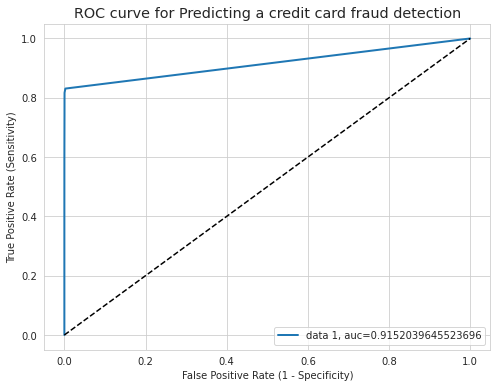

In [62]:
# plot ROC Curve

plt.figure(figsize=(8,6))
auc = metrics.roc_auc_score(y_test, y_pred_proba)
print("AUC - ",auc,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

### Model building with Decision Tree classifier

In [63]:
# Create the parameter grid 
param_dt = { 'criterion':['gini','entropy'],'max_depth': np.arange(5, 15,5),
    'min_samples_leaf': range(20, 150, 50),
    'min_samples_split': range(20, 150, 50),}
# decision tree model
dtree_model=DecisionTreeClassifier()
#use gridsearch to test all values
grid_search = GridSearchCV(dtree_model,
                        param_grid = param_dt, 
                        scoring= 'roc_auc', 
                        cv = 5, 
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True) 
#fit model to data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 14.6min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [64]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,5.563979,0.059200,0.022026,0.002429,gini,5,20,20,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.926558,0.941123,0.931059,0.914166,0.948183,0.932218,0.011776,34,0.949712,0.948113,0.966693,0.935560,0.949788,0.949973,0.009908
1,5.570026,0.038223,0.021930,0.002035,gini,5,20,70,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.940845,0.941121,0.930993,0.899885,0.948154,0.932200,0.017056,35,0.949712,0.948109,0.966665,0.935560,0.949766,0.949962,0.009899
2,5.577614,0.038639,0.022069,0.003874,gini,5,20,120,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.940717,0.941133,0.930998,0.913993,0.948091,0.934987,0.011824,28,0.949574,0.948096,0.966665,0.935432,0.949675,0.949889,0.009938
3,5.517988,0.043434,0.021693,0.001999,gini,5,70,20,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.940644,0.939954,0.930862,0.913883,0.948212,0.934711,0.011778,30,0.949492,0.959917,0.966518,0.942446,0.953344,0.954343,0.008311
4,5.544607,0.058713,0.020244,0.001893,gini,5,70,70,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.940644,0.939966,0.930862,0.913844,0.948212,0.934706,0.011793,31,0.949492,0.959917,0.966518,0.942446,0.953344,0.954343,0.008311
5,5.565365,0.027320,0.019904,0.000780,gini,5,70,120,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.940644,0.939958,0.930862,0.913883,0.948219,0.934713,0.011780,29,0.949492,0.959917,0.966518,0.942446,0.953344,0.954343,0.008311
6,5.533463,0.051677,0.019557,0.000524,gini,5,120,20,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.947583,0.940427,0.938291,0.940584,0.959977,0.945373,0.007946,10,0.956980,0.958848,0.966424,0.955560,0.969333,0.961429,0.005446
7,5.513929,0.054314,0.020815,0.000688,gini,5,120,70,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.947586,0.940427,0.938286,0.940584,0.959977,0.945372,0.007947,11,0.956980,0.958848,0.966424,0.955560,0.969333,0.961429,0.005446
8,5.532076,0.050008,0.020636,0.000770,gini,5,120,120,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.947583,0.940427,0.938291,0.940562,0.959977,0.945368,0.007949,12,0.956980,0.958848,0.966424,0.955560,0.969333,0.961429,0.005446
9,10.975229,0.035020,0.023580,0.003971,gini,10,20,20,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.929582,0.922156,0.941062,0.941009,0.934879,0.933738,0.007200,33,0.964892,0.978221,0.985577,0.963107,0.977674,0.973894,0.008566


In [65]:
# Printing the optimal roc score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print("Best hyperparameters : ", grid_search.best_params_)

Best roc auc score :  0.9569176825078124
Best hyperparameters :  {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 120, 'min_samples_split': 70}


#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [66]:
# Applying the best hyperparameter on the model
# Model with optimal hyperparameter
#best_param={'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 120, 'min_samples_split': 20}
clf_dt = DecisionTreeClassifier(
                        criterion='entropy', 
                        max_depth= 5,
                         min_samples_leaf= 120,
                          min_samples_split= 20, 
                        random_state=100) 
#fit model to train dataset
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=120, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

##### Model evaluation on train data

In [67]:
# Predictions on the train set
y_train_pred_dt = clf_dt.predict(X_train)

# Creating confusion matrix 
cm_train_dtree = metrics.confusion_matrix(y_train, y_train_pred_dt)
print("The confusion matrix is :", cm_train_dtree)
print()
print()
#Display f1 score and classification report of a model.
display_scores(y_train, y_train_pred_dt)

The confusion matrix is : [[198947     67]
 [    98    252]]


F1 Score: 75.34%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199014
           1       0.79      0.72      0.75       350

    accuracy                           1.00    199364
   macro avg       0.89      0.86      0.88    199364
weighted avg       1.00      1.00      1.00    199364



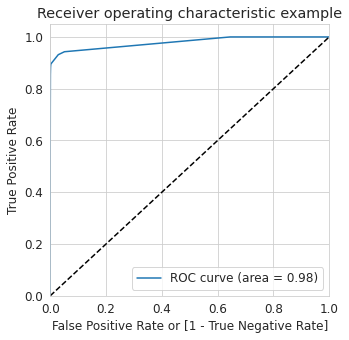

In [68]:
# Predicted probability
y_train_pred_proba_dt = clf_dt.predict_proba(X_train)[:,1]

# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba_dt)

##### Evaluating the model on the test set

In [69]:
# Prediction on test data set
y_test_pred_dt = clf_dt.predict(X_test)

#creating the confusion matrix
cm_test_dtree = metrics.confusion_matrix(y_test, y_test_pred_dt)
print("The confusion matrix is :", cm_test_dtree)
print()
print()
# Display f1 score and classification report of a model.
display_scores(y_test, y_test_pred_dt)

The confusion matrix is : [[85255    46]
 [   52    90]]


F1 Score: 64.75%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.66      0.63      0.65       142

    accuracy                           1.00     85443
   macro avg       0.83      0.82      0.82     85443
weighted avg       1.00      1.00      1.00     85443



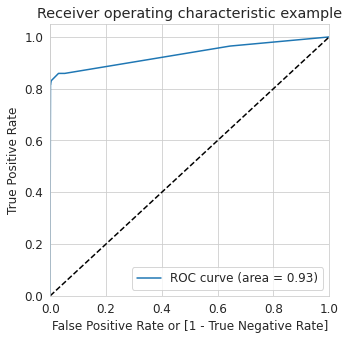

In [70]:
# Predicted probability
y_test_pred_proba_dt = clf_dt.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba_dt)

**Model Summery**

Train Set
- ROC : 98%
- F1 score : 75.34%

Test Set
- ROC : 93%
- F1 score : 64.75%

### Model building with Random Forest

In [71]:
# building the Randomforest dataset

state=48
tuned_parameters = {'max_depth':[3,4,5,6,7,8,9,10],
                    'criterion':['gini','entropy'],
                    'min_samples_split':[2,3,5,7,9], 
                    'max_features':['auto','sqrt', 'log2'],
                    'min_samples_leaf':[1, 10, 25, 50, 75, 100],
                    'n_estimators':[10,20,30,40,50,60,80,100,500,],
                    'max_leaf_nodes':[None, 10, 25, 50, 100, 500]}
# Random forest model
rf_model = RandomForestClassifier(random_state=state)
#use randomizedsearch to test all values
rsearch_cv = RandomizedSearchCV(estimator=rf_model, 
                                param_distributions=tuned_parameters, 
                                cv=3, scoring='roc_auc',
                                verbose=5,
                                n_jobs=-1,
                                random_state=state)
#fit model to data
rsearch_cv.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  9.5min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [72]:
# cv results
cv_results = pd.DataFrame(rsearch_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_leaf_nodes,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,38.583614,0.080295,0.378496,0.010944,60,7,75,100,auto,6,gini,"{'n_estimators': 60, 'min_samples_split': 7, '...",0.980629,0.947969,0.959946,0.962848,0.013490,7
1,6.829233,0.071261,0.119843,0.000442,20,2,75,50,sqrt,3,gini,"{'n_estimators': 20, 'min_samples_split': 2, '...",0.962686,0.905395,0.963003,0.943694,0.027082,10
2,18.027667,0.069177,0.290287,0.006407,50,3,25,500,log2,4,gini,"{'n_estimators': 50, 'min_samples_split': 3, '...",0.970355,0.938433,0.956648,0.955146,0.013075,8
3,13.246271,0.022479,0.185142,0.006499,30,5,50,100,log2,3,entropy,"{'n_estimators': 30, 'min_samples_split': 5, '...",0.967678,0.958450,0.973976,0.966701,0.006376,4
4,85.078683,0.441264,0.645607,0.006159,100,3,75,50,auto,5,entropy,"{'n_estimators': 100, 'min_samples_split': 3, ...",0.978599,0.964040,0.970134,0.970925,0.005970,3
5,49.120033,0.943857,0.344333,0.007672,60,5,10,10,auto,7,entropy,"{'n_estimators': 60, 'min_samples_split': 5, '...",0.980142,0.967125,0.972722,0.973330,0.005332,1
6,44.882950,0.568990,0.492511,0.011987,60,9,50,25,log2,9,gini,"{'n_estimators': 60, 'min_samples_split': 9, '...",0.980839,0.946703,0.972087,0.966543,0.014477,5
7,86.594180,1.355194,0.758173,0.036901,100,9,75,500,log2,7,entropy,"{'n_estimators': 100, 'min_samples_split': 9, ...",0.974143,0.965566,0.977274,0.972327,0.004949,2
8,5.432474,0.061752,0.086978,0.003671,10,3,50,50,sqrt,5,gini,"{'n_estimators': 10, 'min_samples_split': 3, '...",0.957143,0.917209,0.976687,0.950346,0.024753,9
9,22.881317,3.332056,0.225555,0.049696,30,7,50,500,auto,8,gini,"{'n_estimators': 30, 'min_samples_split': 7, '...",0.969239,0.957788,0.971778,0.966268,0.006085,6


In [73]:
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', rsearch_cv.best_score_)
#print the optimum value of hyperparameters
# print CV_rfc.best_params_
print('Best hyperparameters: ', rsearch_cv.best_params_)

Best ROC AUC score:  0.9733296243169661
Best hyperparameters:  {'n_estimators': 60, 'min_samples_split': 5, 'min_samples_leaf': 10, 'max_leaf_nodes': 10, 'max_features': 'auto', 'max_depth': 7, 'criterion': 'entropy'}


#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [74]:
#applying the best optimal hyperparameters on train dataset
clf_rf=RandomForestClassifier(random_state=48,
                           class_weight='balanced',
                           n_estimators=60,
                           min_samples_split= 5,
                           min_samples_leaf= 10,
                            max_leaf_nodes= 10,
                            max_features= 'auto',
                            max_depth= 7,
                            criterion= 'entropy')
clf_rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=7, max_features='auto',
                       max_leaf_nodes=10, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=60,
                       n_jobs=None, oob_score=False, random_state=48, verbose=0,
                       warm_start=False)

##### Evaluation on train data

In [75]:
# Prediction on train data
y_train_pred_rf = clf_rf.predict(X_train)

# Creating the confusion matrix
cm_train_rfc = metrics.confusion_matrix(y_train, y_train_pred_rf)
print("The confusion matrix is :", cm_train_rfc)
print()
print()

#Display f1 score and classification report of a model.
display_scores(y_train, y_train_pred_rf)

The confusion matrix is : [[197336   1678]
 [    31    319]]


F1 Score: 27.18%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00    199014
           1       0.16      0.91      0.27       350

    accuracy                           0.99    199364
   macro avg       0.58      0.95      0.63    199364
weighted avg       1.00      0.99      0.99    199364



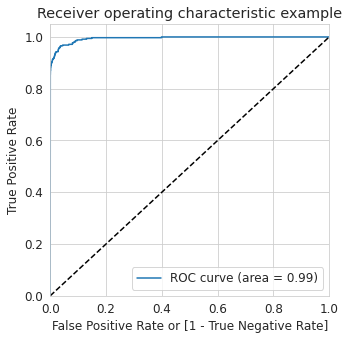

In [76]:
# Predicted probability
y_train_pred_proba_rf = clf_rf.predict_proba(X_train)[:,1]

# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba_rf)

##### Evaluation on test data

In [77]:
# Prediction on train data
y_test_pred_rf = clf_rf.predict(X_test)

# Creating the confusion matrix
cm_test_rfc = metrics.confusion_matrix(y_test, y_test_pred_rf)
print("The confusion matrix is :", cm_test_rfc)
print()
print()

#Display f1 score and classification report of a model.
display_scores(y_test, y_test_pred_rf)

The confusion matrix is : [[84554   747]
 [   24   118]]


F1 Score: 23.44%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     85301
           1       0.14      0.83      0.23       142

    accuracy                           0.99     85443
   macro avg       0.57      0.91      0.61     85443
weighted avg       1.00      0.99      0.99     85443



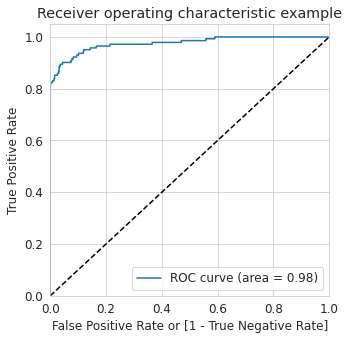

In [78]:
# Predicted probability
y_test_pred_proba_rf = clf_rf.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba_rf)

**Model Summery**

Train Set
- ROC : 99%
- F1 score : 27.18%

Test Set
- ROC : 98%
- F1 score : 23.44%

### Model building with XGBoost

In [79]:
# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_xg = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_xg.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed: 11.5min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=2, min_child_weight=1,
                                     missing=None, n_estimators=200, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_scor

In [80]:
# cv results
cv_results = pd.DataFrame(model_xg.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,31.206690,0.197733,0.363461,0.005337,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.971153,0.958423,0.978262,0.969279,0.008207,5,0.999767,0.999967,0.999798,0.999844,0.000088
1,39.573568,0.070422,0.359902,0.000104,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.986520,0.962944,0.979508,0.976324,0.009884,1,0.999967,0.999993,0.999912,0.999957,0.000034
2,42.300573,0.087305,0.364604,0.002167,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.981058,0.964820,0.979530,0.975136,0.007321,2,0.999960,0.999995,0.999945,0.999966,0.000021
3,30.685158,0.286421,0.374751,0.004081,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.967744,0.947848,0.978413,0.964669,0.012666,6,0.999982,1.000000,0.999998,0.999993,0.000008
4,38.152647,0.426266,0.375893,0.001424,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.969124,0.967006,0.973862,0.969997,0.002866,4,1.000000,1.000000,1.000000,1.000000,0.000000
5,40.808640,0.494200,0.376805,0.000544,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.970385,0.964742,0.979517,0.971548,0.006088,3,1.000000,1.000000,1.000000,1.000000,0.000000


In [81]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_xg.best_score_)
print(model_xg.best_estimator_)

Best roc auc score :  0.9763240297507858
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.6, verbosity=1)


In [82]:
# Printing best params
model_xg.best_params_


{'learning_rate': 0.2, 'subsample': 0.6}

#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [83]:
# applying the best parameters on train dataset
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.6,
          'objective':'binary:logistic'}

# fit model on training data
clf_xgb = XGBClassifier(params = params)
# fit the model
clf_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic',
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

##### Model evaluation on train data

In [84]:
#predicting on train dataset
y_train_pred_xg = clf_xgb.predict(X_train)

#creating the confusion matrix
cm_train_xg = metrics.confusion_matrix(y_train, y_train_pred_xg)
print("The confusion matrix is :", cm_train_xg)
print()
print()

#Display f1 score and classification report of a model.
display_scores(y_train, y_train_pred_xg)

The confusion matrix is : [[199005      9]
 [    53    297]]


F1 Score: 90.55%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199014
           1       0.97      0.85      0.91       350

    accuracy                           1.00    199364
   macro avg       0.99      0.92      0.95    199364
weighted avg       1.00      1.00      1.00    199364



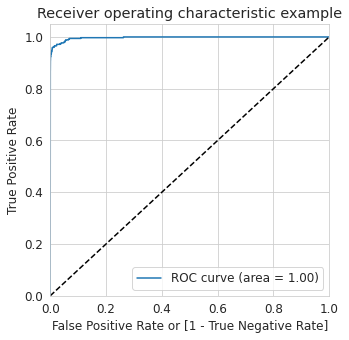

In [85]:
# Predicted probability
y_train_pred_proba_xg = clf_xgb.predict_proba(X_train)[:,1]

# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba_xg)

##### Model evaluation on test set

In [86]:
#predicting on train dataset
y_test_pred_xg = clf_xgb.predict(X_test)

#creating the confusion matrix
cm_test_xg = metrics.confusion_matrix(y_test, y_test_pred_xg)
print("The confusion matrix is :", cm_test_xg)
print()
print()

#Display f1 score and classification report of a model.
display_scores(y_test, y_test_pred_xg)

The confusion matrix is : [[85280    21]
 [   32   110]]


F1 Score: 80.59%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.84      0.77      0.81       142

    accuracy                           1.00     85443
   macro avg       0.92      0.89      0.90     85443
weighted avg       1.00      1.00      1.00     85443



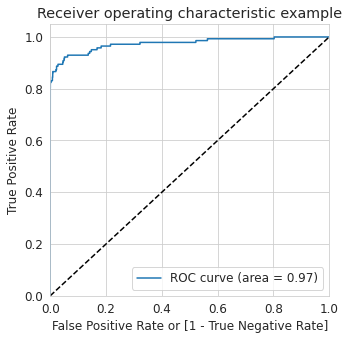

In [87]:
# Predicted probability
y_test_pred_proba_xg = clf_xgb.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba_xg)

**Model Summery**

Train Set
- ROC : 100%
- F1 score : 90.55%

Test Set
- ROC : 97%
- F1 score : 80.59%

- XGBoost model is giving good performance on the imbalanced data among these 5 models. ROC score on the train data is 100% and on test data 97%.

### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 17
2nd Top var = 14
3rd Top var = 10


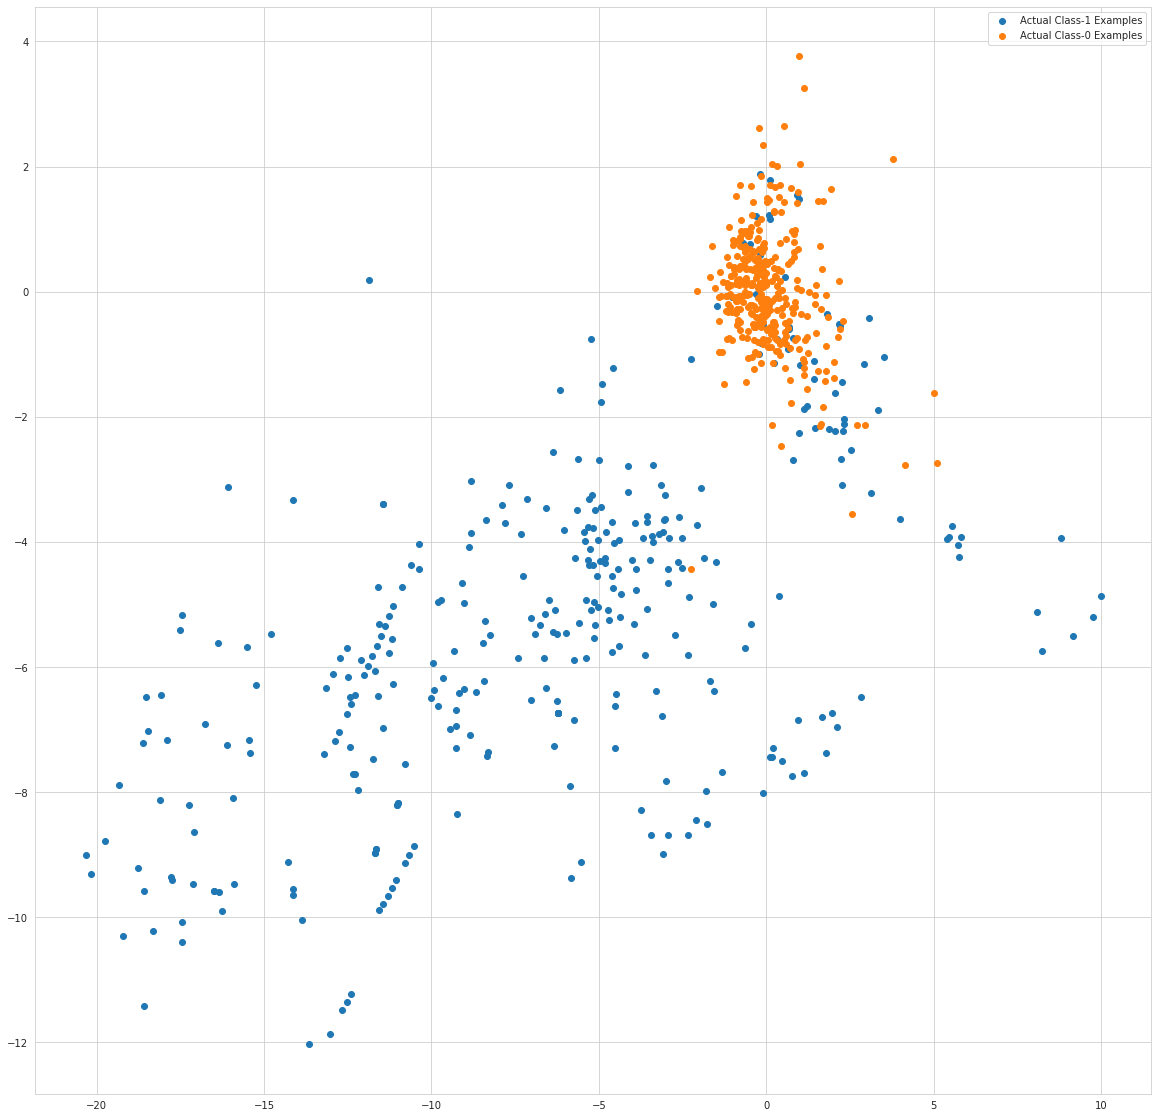

In [88]:
var_imp = []
for i in clf_xgb.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf_xgb.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf_xgb.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf_xgb.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf_xgb.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf_xgb.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

### Random Oversampling
Random oversampling duplicates examples from the minority class in the training dataset and can result in overfitting for some models.

In [89]:
from imblearn.over_sampling import RandomOverSampler #- import the packages

#perform cross validation & then balance classes on X_train_cv & y_train_cv using Random Oversampling
# Define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')

# Fit and apply the transform
X_over, y_over = oversample.fit_resample(X_train, y_train)

In [90]:
from collections import Counter
# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution 
print('New class distribution:-',Counter(y_over))

Before sampling class distribution:- Counter({0: 199014, 1: 350})
New class distribution:- Counter({0: 199014, 1: 199014})


## Model Building
- Build different models on the balanced dataset and see the result

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

### Logistic Regression  with Random Oversampling

In [91]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_over, y_over)
#print the evaluation result by choosing a evaluation matrix
print('Best ROC AUC score: ', model_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  1.3min finished


Best ROC AUC score:  0.9896670608265958
Best hyperparameters:  {'C': 100}


In [92]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.382063,0.119883,0.037537,0.000749,0.01,{'C': 0.01},0.989687,0.989350,0.989456,0.989993,0.989730,0.989643,0.000225,6,0.989567,0.989692,0.989676,0.989680,0.989647,0.989652,0.000045
1,2.418470,0.153181,0.037761,0.000464,0.1,{'C': 0.1},0.989691,0.989375,0.989488,0.990025,0.989750,0.989666,0.000225,5,0.989591,0.989718,0.989705,0.989704,0.989667,0.989677,0.000046
2,2.478215,0.122052,0.037439,0.000376,1,{'C': 1},0.989691,0.989375,0.989493,0.990025,0.989750,0.989667,0.000224,4,0.989592,0.989719,0.989708,0.989705,0.989667,0.989678,0.000047
3,2.479400,0.090283,0.038371,0.001541,10,{'C': 10},0.989691,0.989375,0.989493,0.990026,0.989751,0.989667,0.000224,3,0.989592,0.989720,0.989709,0.989705,0.989667,0.989679,0.000047
4,2.471568,0.081440,0.039653,0.002033,100,{'C': 100},0.989691,0.989376,0.989493,0.990026,0.989750,0.989667,0.000224,1,0.989592,0.989720,0.989709,0.989705,0.989667,0.989679,0.000047
5,2.485570,0.089753,0.037482,0.000430,1000,{'C': 1000},0.989691,0.989376,0.989493,0.990026,0.989750,0.989667,0.000224,2,0.989592,0.989720,0.989709,0.989705,0.989667,0.989679,0.000047


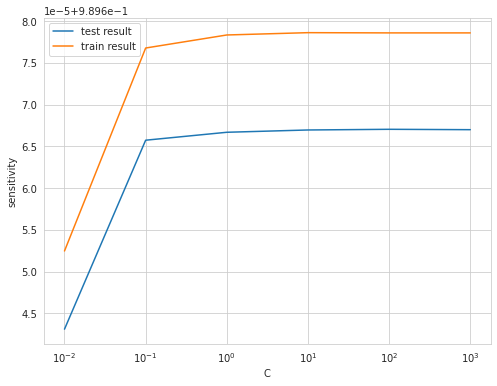

In [93]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [94]:
# Applying the best hyperparameter on the model
lr_over_param = LogisticRegression(C=100)

# Fitting the model on train dataset
lr_over_param.fit(X_over, y_over)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

##### Evaluating the model on train data

In [95]:
# Predictions on the train set
y_train_pred = lr_over_param.predict(X_over)

In [96]:
#creating the confusion matrix
over_train_lr = metrics.confusion_matrix(y_over, y_train_pred)
over_train_lr

array([[194342,   4672],
       [ 14743, 184271]])

In [97]:
# Printing scores
display_scores(y_over, y_train_pred)

F1 Score: 95.0%
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.98      0.95    199014
           1       0.98      0.93      0.95    199014

    accuracy                           0.95    398028
   macro avg       0.95      0.95      0.95    398028
weighted avg       0.95      0.95      0.95    398028



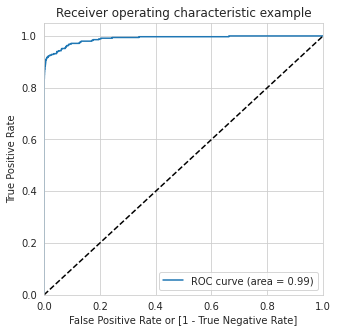

In [98]:
# Predicted probability
y_train_pred_proba = lr_over_param.predict_proba(X_over)[:,1]
# Plot the ROC curve
draw_roc(y_over, y_train_pred_proba)

##### Evaluating the model on test data

In [99]:
# Predictions on the test set
y_test_pred = lr_over_param.predict(X_test)

In [100]:
#creating the confusion matrix
over_test_lr = metrics.confusion_matrix(y_test, y_test_pred)
over_test_lr

array([[83221,  2080],
       [   15,   127]])

In [101]:
# Printing scores
display_scores(y_test, y_test_pred)

F1 Score: 10.81%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     85301
           1       0.06      0.89      0.11       142

    accuracy                           0.98     85443
   macro avg       0.53      0.93      0.55     85443
weighted avg       1.00      0.98      0.99     85443



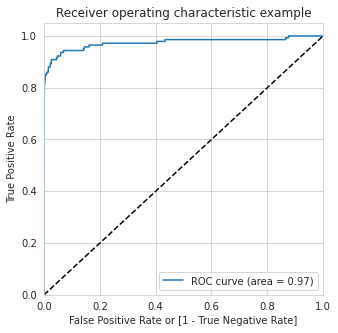

In [102]:
# Predicted probability
y_test_pred_proba = lr_over_param.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

### Similarly explore other algorithms on balanced dataset by building models like:
- KNN
- Decision Tree
- Random Forest
- XGBoost

### KNN with Random Oversampling

In [103]:
model_knn = KNeighborsClassifier(n_neighbors=12)
model_knn.fit(X_over,y_over)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='uniform')

In [104]:
# Try KNN to see how well it predicts fraud on the dataset
pred= model_knn.predict(X_test)

In [105]:
# confusion matrix
print(confusion_matrix(y_test,pred))

[[85175   126]
 [   25   117]]


In [106]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.48      0.82      0.61       142

    accuracy                           1.00     85443
   macro avg       0.74      0.91      0.80     85443
weighted avg       1.00      1.00      1.00     85443



In [107]:
print("Accuracy -->",accuracy_score(y_test,pred))
print("Precison -->",precision_score(y_test,pred))
print("Recall -->",recall_score(y_test,pred))
print("F1 -->",f1_score(y_test,pred))
print("MCC -->",matthews_corrcoef(y_test,pred))

Accuracy --> 0.9982327399552918
Precison --> 0.48148148148148145
Recall --> 0.823943661971831
F1 --> 0.6077922077922079
MCC --> 0.6290954410613145


In [108]:
# predicted probability
y_pred_proba = model_knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

AUC -  0.9151670199860609 



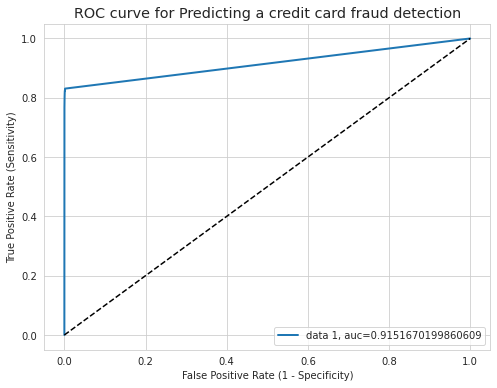

In [109]:
# plot ROC Curve

plt.figure(figsize=(8,6))
auc = metrics.roc_auc_score(y_test, y_pred_proba)
print("AUC - ",auc,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

### Decision Tree with Random Oversampling

In [110]:
from sklearn.tree import DecisionTreeClassifier
param_dt = { 'criterion':['gini','entropy'],'max_depth': np.arange(5, 15,5),
    'min_samples_leaf': range(20, 150, 50),
    'min_samples_split': range(20, 150, 50),}
# decision tree model
dtree_model=DecisionTreeClassifier()
#use gridsearch to test all values
dtree_over_cv = GridSearchCV(dtree_model,
                        param_grid = param_dt, 
                        scoring= 'roc_auc', 
                        cv = 5, 
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True) 
#fit model to data
dtree_over_cv.fit(X_over, y_over)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 16.8min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [111]:
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', dtree_over_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', dtree_over_cv.best_params_)

Best ROC AUC score:  0.9996817444996637
Best hyperparameters:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 20, 'min_samples_split': 120}


#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [112]:
# Applying the best hyperparameter on the model

dt_over_model = DecisionTreeClassifier(
                        criterion='entropy', 
                        max_depth= 10,
                         min_samples_leaf= 20,
                          min_samples_split= 120, 
                        random_state=100) 
#fit model to train dataset
dt_over_model.fit(X_over, y_over)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=120,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

##### Model evaluation on train data

In [113]:
# Predictions on the train set
y_over_pred_dt = dt_over_model.predict(X_over)

#creating the confusion matrix
cm_train_dtree = metrics.confusion_matrix(y_over, y_over_pred_dt)
print("The confusion matrix is :", cm_train_dtree)
print()
print()

#Display f1 score and classification report of a model.
display_scores(y_over, y_over_pred_dt)

The confusion matrix is : [[196520   2494]
 [     0 199014]]


F1 Score: 99.38%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99    199014
           1       0.99      1.00      0.99    199014

    accuracy                           0.99    398028
   macro avg       0.99      0.99      0.99    398028
weighted avg       0.99      0.99      0.99    398028



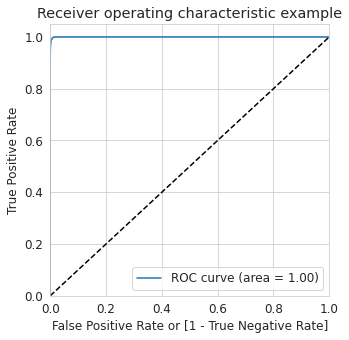

In [114]:
# Predicted probability
y_train_pred_proba_dt = dt_over_model.predict_proba(X_over)[:,1]
# Plot the ROC curve
draw_roc(y_over, y_train_pred_proba_dt)

##### Prediction on test data

In [115]:
# Predictions on the train set
y_testover_pred_dt = dt_over_model.predict(X_test)

#creating the confusion matrix
cm_over_test_dtree = metrics.confusion_matrix(y_test, y_testover_pred_dt)
print("The confusion matrix is :", cm_over_test_dtree)
print()
print()

#Display f1 score and classification report of a model.
display_scores(y_test, y_testover_pred_dt)

The confusion matrix is : [[84202  1099]
 [   30   112]]


F1 Score: 16.56%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     85301
           1       0.09      0.79      0.17       142

    accuracy                           0.99     85443
   macro avg       0.55      0.89      0.58     85443
weighted avg       1.00      0.99      0.99     85443



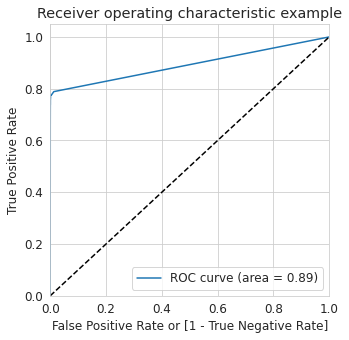

In [116]:
# Predicted probability
y_test_pred_proba_dt = dt_over_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba_dt)

### Random Forest with Random Oversampling

In [117]:

state=48
tuned_parameters = {'max_depth':[3,4,5,6,7,8,9,10],
                    'criterion':['gini','entropy'],
                    'min_samples_split':[2,3,5,7,9], 
                    'max_features':['auto','sqrt', 'log2'],
                    'min_samples_leaf':[1, 10, 25, 50, 75, 100],
                    'n_estimators':[10,20,30,40,50,60,80,100,500,],
                    'max_leaf_nodes':[None, 10, 25, 50, 100, 500]}
# Random forest model
model = RandomForestClassifier(random_state=state)
# use randomizedsearch to test all values
rsearch_cv_over = RandomizedSearchCV(estimator=model, 
                                param_distributions=tuned_parameters, 
                                cv=3, scoring='roc_auc',
                                verbose=5,
                                n_jobs=-1,
                                random_state=state)
# fit the model
rsearch_cv_over.fit(X_over, y_over)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 13.0min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [118]:
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', rsearch_cv_over.best_score_)
#print the optimum value of hyperparameters
# print CV_rfc.best_params_
print('Best hyperparameters: ', rsearch_cv_over.best_params_)

Best ROC AUC score:  0.9995259328450067
Best hyperparameters:  {'n_estimators': 100, 'min_samples_split': 9, 'min_samples_leaf': 75, 'max_leaf_nodes': 500, 'max_features': 'log2', 'max_depth': 7, 'criterion': 'entropy'}


#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [119]:
#applying the best parameters on train dataset
rfc_over_model = RandomForestClassifier(random_state=48,
                           class_weight='balanced',
                           n_estimators=100,
                           min_samples_split= 9,
                           min_samples_leaf= 75,
                            max_leaf_nodes= 500,
                            max_features= 'log2',
                            max_depth= 7,
                            criterion= 'entropy')
# fit the model on train data
rfc_over_model.fit(X_over,y_over)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=7, max_features='log2',
                       max_leaf_nodes=500, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=75, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=48, verbose=0,
                       warm_start=False)

##### Model evaluation on train data

In [120]:
#predicting on train dataset
y_over_pred_rfc=rfc_over_model.predict(X_over)

In [121]:
#creating the confusion matrix
cm_train_rfc = metrics.confusion_matrix(y_over, y_over_pred_rfc)
print("The confusion matrix is :", cm_train_rfc)
print()
print()

#Display f1 score and classification report of a model.
display_scores(y_over, y_over_pred_rfc)

The confusion matrix is : [[198776    238]
 [  9096 189918]]


F1 Score: 97.6%
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98    199014
           1       1.00      0.95      0.98    199014

    accuracy                           0.98    398028
   macro avg       0.98      0.98      0.98    398028
weighted avg       0.98      0.98      0.98    398028



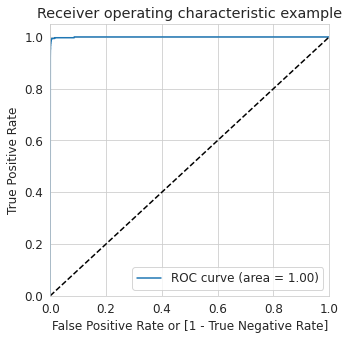

In [122]:
# Predicted probability
y_train_over_pred_proba_rfc = rfc_over_model.predict_proba(X_over)[:,1]

# Plot the ROC curve
draw_roc(y_over, y_train_over_pred_proba_rfc)

##### Evaluation on test data

In [123]:
y_testover_pred_rfc =rfc_over_model.predict(X_test)

In [124]:
#creating the confusion matrix
cm_test_rfc = metrics.confusion_matrix(y_test, y_testover_pred_rfc)
print("The confusion matrix is :", cm_test_rfc)
print()
print()

#Display f1 score and classification report of a model.
display_scores(y_test, y_testover_pred_rfc)

The confusion matrix is : [[85173   128]
 [   25   117]]


F1 Score: 60.47%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.48      0.82      0.60       142

    accuracy                           1.00     85443
   macro avg       0.74      0.91      0.80     85443
weighted avg       1.00      1.00      1.00     85443



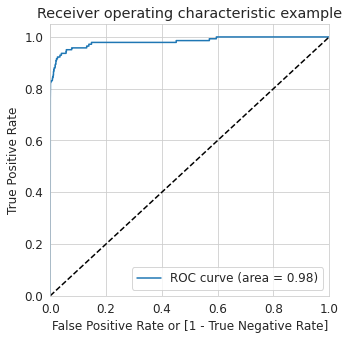

In [125]:
# Predicted probability
y_test_over_pred_proba_rfc = rfc_over_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_over_pred_proba_rfc)

### XGBoost with Random Oversampling

In [126]:
# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_xg_over = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_xg_over.fit(X_over, y_over)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed: 20.3min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=2, min_child_weight=1,
                                     missing=None, n_estimators=200, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_scor

In [127]:
# cv results
cv_results = pd.DataFrame(model_xg_over.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,59.459173,0.306164,0.687667,0.035473,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.999885,0.999951,0.999920,0.999918,0.000027,5,0.999936,0.999929,0.999938,0.999934,4.056335e-06
1,68.069452,0.047361,0.650617,0.001189,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.999907,0.999948,0.999907,0.999921,0.000019,4,0.999943,0.999933,0.999933,0.999936,4.968814e-06
2,69.285983,0.165678,0.652080,0.000409,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.999892,0.999943,0.999907,0.999914,0.000022,6,0.999935,0.999922,0.999935,0.999931,6.031186e-06
3,58.837426,0.143324,0.674428,0.002697,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.999973,0.999983,0.999976,0.999977,0.000004,3,0.999994,0.999996,0.999999,0.999997,1.900317e-06
4,67.951137,0.079636,0.665872,0.007577,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.999987,0.999993,0.999975,0.999985,0.000008,2,1.000000,1.000000,1.000000,1.000000,0.000000e+00
5,69.656464,0.229754,0.668615,0.007412,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.999984,0.999998,0.999978,0.999987,0.000008,1,0.999999,1.000000,1.000000,1.000000,5.068152e-07


In [221]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_xg_over.best_score_)
print(model_xg_over.best_estimator_)

Best roc auc score :  0.9999866192283094
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.6, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.9, verbosity=1)


#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [222]:
#applying the best parameters on train dataset
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
          'objective':'binary:logistic'}

# fit model on training data
xgb_over_model = XGBClassifier(params = params)
xgb_over_model.fit(X_over, y_over)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic',
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

##### Model evaluation on train data

In [223]:
#predicting on train dataset
predict_xg_over=xgb_over_model.predict(X_over)

In [224]:
#creating the confusion matrix
cm_train_xg= metrics.confusion_matrix(y_over, predict_xg_over)
print("The confusion matrix is :", cm_train_xg)
print()
print()

#Display f1 score and classification report of a model.
display_scores(y_over, predict_xg_over)

The confusion matrix is : [[198174    840]
 [   593 198421]]


F1 Score: 99.64%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199014
           1       1.00      1.00      1.00    199014

    accuracy                           1.00    398028
   macro avg       1.00      1.00      1.00    398028
weighted avg       1.00      1.00      1.00    398028



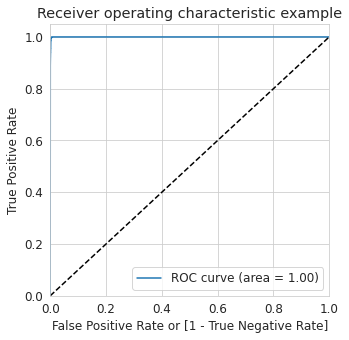

In [132]:
# Predicted probability
y_over_pred_proba_xg = xgb_over_model.predict_proba(X_over)[:,1]

# Plot the ROC curve
draw_roc(y_over, y_over_pred_proba_xg)

##### Model evaluation on test data

In [133]:
#predicting on train dataset
predict_xg_over_test=xgb_over_model.predict(X_test.values)

In [134]:
#creating the confusion matrix
xg_test_cm = metrics.confusion_matrix(y_test, predict_xg_over_test)
print("The confusion matrix is :", xg_test_cm)
print()
print()

#Display f1 score and classification report of a model.
display_scores(y_test, predict_xg_over_test)

The confusion matrix is : [[84895   406]
 [   24   118]]


F1 Score: 35.44%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.23      0.83      0.35       142

    accuracy                           0.99     85443
   macro avg       0.61      0.91      0.68     85443
weighted avg       1.00      0.99      1.00     85443



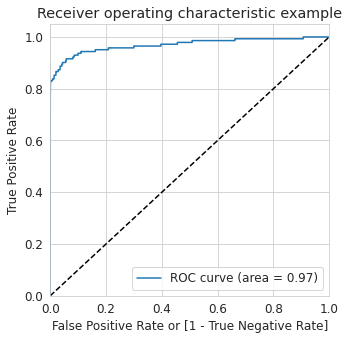

In [135]:
# Predicted probability
y_over_pred_proba_xg = xgb_over_model.predict_proba(X_test.values)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_over_pred_proba_xg)

### SMOTE (Synthetic Minority Oversampling Technique)

In this technique, instead of simply duplicating data from the minority class, we synthesize new data points from the minority class. This is a type of data augmentation for tabular data can be very effective. This approach to synthesizing new data is called the Synthetic Minority Oversampling Technique, or SMOTE for short.

Understanding SMOTE:

- Solving the Class Imbalance: SMOTE creates synthetic points from the minority class in order to reach an equal balance between the minority and majority class.
- Location of the synthetic points: SMOTE picks the distance between the closest neighbors of the minority class, in between these distances it creates synthetic points.

### Print the class distribution after applying SMOTE 

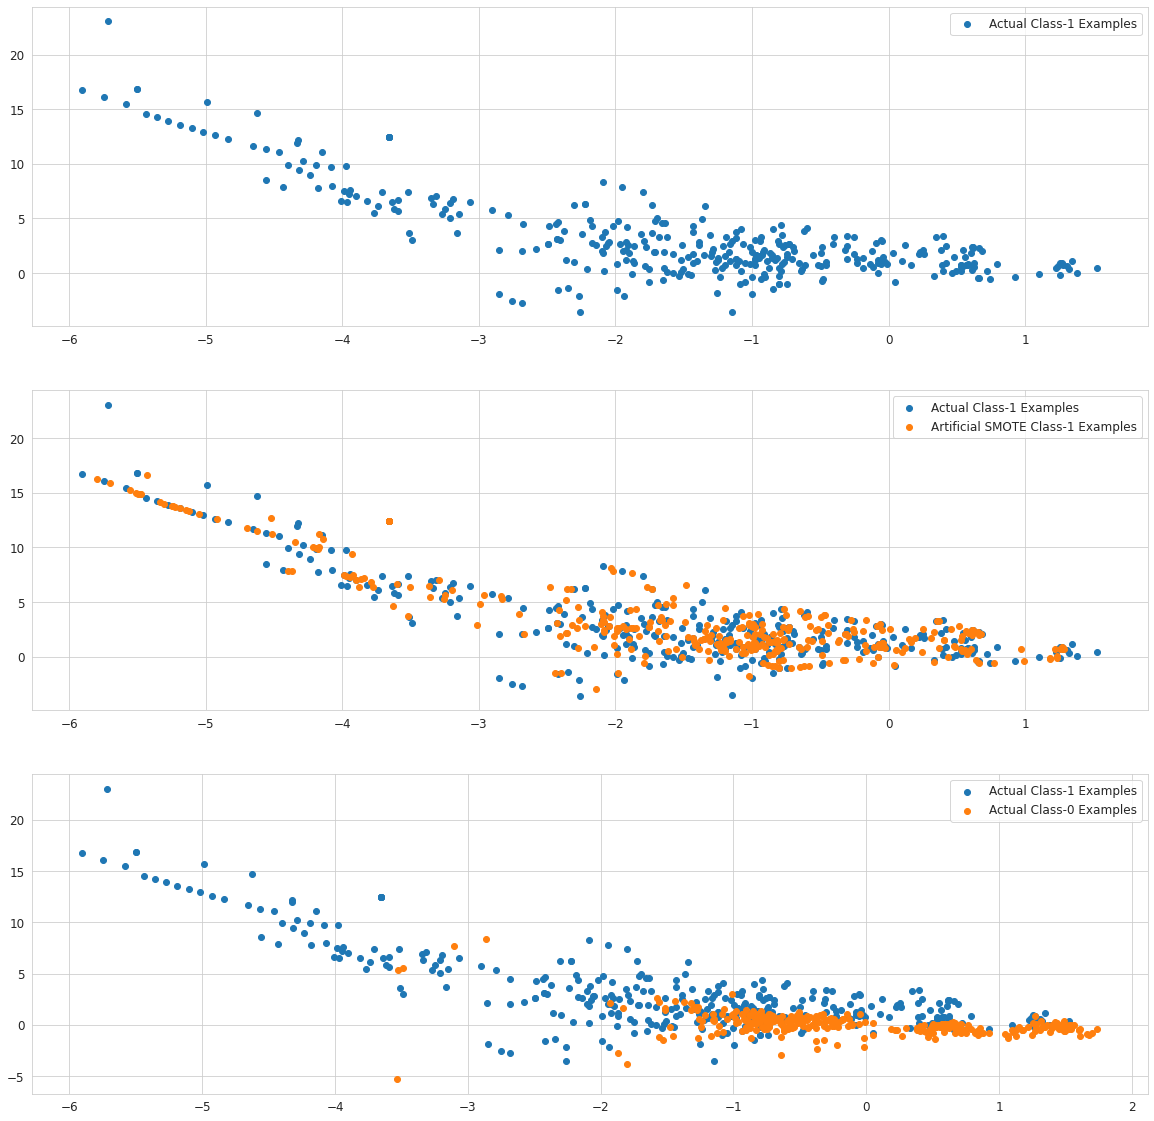

In [136]:
import warnings
warnings.filterwarnings("ignore")
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

### Logistic Regression with SMOTE

In [137]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_smote, y_train_smote)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  1.3min finished


Best ROC AUC score:  0.9907640264791008
Best hyperparameters:  {'C': 1}


In [138]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.262945,0.075332,0.040708,0.000853,0.01,{'C': 0.01},0.990885,0.990911,0.990758,0.990400,0.990761,0.990743,0.000182,6,0.990696,0.990706,0.990714,0.990886,0.990773,0.990755,0.000071
1,2.259938,0.057899,0.041838,0.003861,0.1,{'C': 0.1},0.990885,0.990932,0.990790,0.990422,0.990791,0.990764,0.000180,5,0.990719,0.990729,0.990736,0.990902,0.990789,0.990775,0.000068
2,2.294081,0.061108,0.040908,0.001910,1,{'C': 1},0.990883,0.990933,0.990791,0.990422,0.990792,0.990764,0.000180,1,0.990719,0.990729,0.990737,0.990902,0.990789,0.990775,0.000068
3,2.296809,0.079464,0.039859,0.000415,10,{'C': 10},0.990882,0.990933,0.990792,0.990421,0.990792,0.990764,0.000180,4,0.990719,0.990729,0.990737,0.990901,0.990789,0.990775,0.000068
4,2.323571,0.069951,0.040369,0.001977,100,{'C': 100},0.990882,0.990933,0.990792,0.990421,0.990792,0.990764,0.000180,2,0.990719,0.990729,0.990737,0.990901,0.990789,0.990775,0.000068
5,2.291003,0.083625,0.039930,0.000531,1000,{'C': 1000},0.990882,0.990933,0.990792,0.990421,0.990792,0.990764,0.000180,3,0.990719,0.990729,0.990737,0.990901,0.990789,0.990775,0.000068


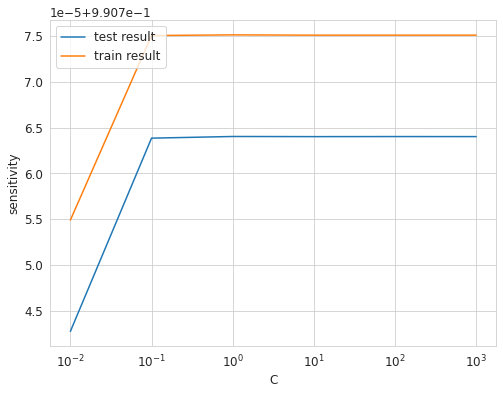

In [139]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [140]:
# Instantiating the model
logreg_smote_model = LogisticRegression(C=0.1)

# Fitting the model with balanced data
logreg_smote_model.fit(X_train_smote, y_train_smote)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

##### Evaluating the model on train data

In [141]:
# Predictions on the train set
y_smote_pred_lr = logreg_smote_model.predict(X_train_smote)

In [142]:
#creating the confusion matrix
cm_smote_trainlr = metrics.confusion_matrix(y_train_smote, y_smote_pred_lr)
cm_smote_trainlr

array([[194112,   4902],
       [ 14871, 184143]])

In [143]:
# Display f1 score and classification report of a model.
display_scores(y_train_smote, y_smote_pred_lr)

F1 Score: 94.9%
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.98      0.95    199014
           1       0.97      0.93      0.95    199014

    accuracy                           0.95    398028
   macro avg       0.95      0.95      0.95    398028
weighted avg       0.95      0.95      0.95    398028



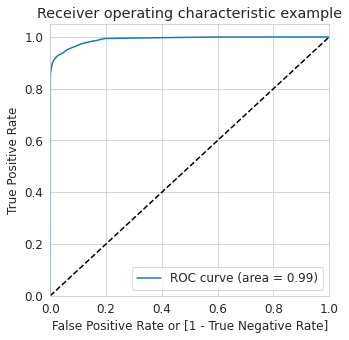

In [144]:
# Predicted probability
y_smote_pred_proba  = logreg_smote_model.predict_proba(X_train_smote)[:,1]
# Plot the ROC curve
draw_roc(y_train_smote, y_smote_pred_proba)

##### Evaluating on test data

In [145]:
# Predictions on the test set
y_smote_pred_test_lr = logreg_smote_model.predict(X_test)

In [146]:
#creating the confusion matrix
cm_smote_testlr = metrics.confusion_matrix(y_test, y_smote_pred_test_lr)
cm_smote_testlr

array([[83090,  2211],
       [   14,   128]])

In [147]:
# Display f1 score and classification report of a model.
display_scores(y_test, y_smote_pred_test_lr)

F1 Score: 10.32%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     85301
           1       0.05      0.90      0.10       142

    accuracy                           0.97     85443
   macro avg       0.53      0.94      0.54     85443
weighted avg       1.00      0.97      0.99     85443



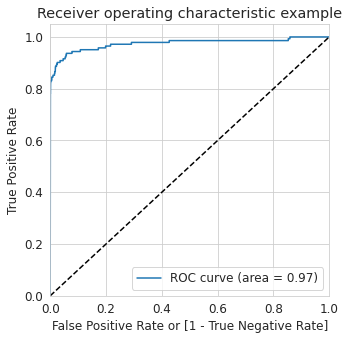

In [148]:
#getting the probability
ytest_smote_pred_proba_lr = logreg_smote_model.predict_proba(X_test)[:,1]

#plotting roc-auc curve 
draw_roc(y_test,ytest_smote_pred_proba_lr)

##### Build models on other algorithms to see the best performing on SMOTE

### Decision Tree with SMOTE

In [149]:
# Create the parameter grid 
param_dt = { 'criterion':['gini','entropy'],'max_depth': np.arange(5, 15,5),
    'min_samples_leaf': range(20, 150, 50),
    'min_samples_split': range(20, 150, 50),}
# decision tree model
dtree_model=DecisionTreeClassifier()
#use gridsearch to test all values
dtree_gscv_smote = GridSearchCV(dtree_model,
                        param_grid = param_dt, 
                        scoring= 'roc_auc', 
                        cv = 5, 
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True) 
#fit model to data
dtree_gscv_smote.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 30.5min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [150]:
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', dtree_gscv_smote.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', dtree_gscv_smote.best_params_)

Best ROC AUC score:  0.9988905857671643
Best hyperparameters:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 20, 'min_samples_split': 20}


#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [151]:
# Applying the best hyperparameter on the model
#best_param={'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 20, 'min_samples_split': 70}
dt_smote_model = DecisionTreeClassifier(
                        criterion='entropy', 
                        max_depth= 10,
                         min_samples_leaf= 20,
                          min_samples_split= 70, 
                        random_state=100) 
#fit model to train dataset
dt_smote_model.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=70,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

##### Evaluating the model on train data

In [152]:
# Predictions on the train set
y_smote_train_pred_dt = dt_smote_model.predict(X_train_smote)

#creating the confusion matrix
cm_smote_train_dtree = metrics.confusion_matrix(y_train_smote, y_smote_train_pred_dt)
print("The confusion matrix is :", cm_smote_train_dtree)
print()
print()

#Display f1 score and classification report of a model.
display_scores(y_train_smote, y_smote_train_pred_dt)

The confusion matrix is : [[196197   2817]
 [  2469 196545]]


F1 Score: 98.67%
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99    199014
           1       0.99      0.99      0.99    199014

    accuracy                           0.99    398028
   macro avg       0.99      0.99      0.99    398028
weighted avg       0.99      0.99      0.99    398028



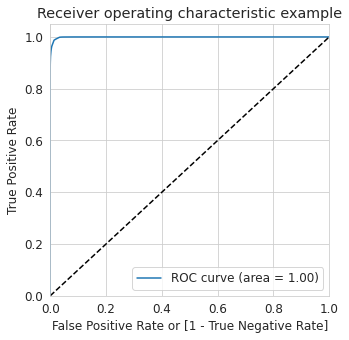

In [153]:
#getting the probability
y_tr_pred_smote_proba_dt = dt_smote_model.predict_proba(X_train_smote)[:,1]

#displaying  ROC-AUC score plot for the decision tree
draw_roc(y_train_smote,y_tr_pred_smote_proba_dt)

##### Evaluating the model on test set

In [154]:
# Predictions on the train set
y_test_smote_pred_dc = dt_smote_model.predict(X_test)

#creating the confusion matrix
cm_smote_test_dtree = metrics.confusion_matrix(y_test, y_test_smote_pred_dc)
print("The confusion matrix is :", cm_smote_test_dtree)
print()
print()

#Display f1 score and classification report of a model.
display_scores(y_test, y_test_smote_pred_dc)

The confusion matrix is : [[83975  1326]
 [   26   116]]


F1 Score: 14.65%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     85301
           1       0.08      0.82      0.15       142

    accuracy                           0.98     85443
   macro avg       0.54      0.90      0.57     85443
weighted avg       1.00      0.98      0.99     85443



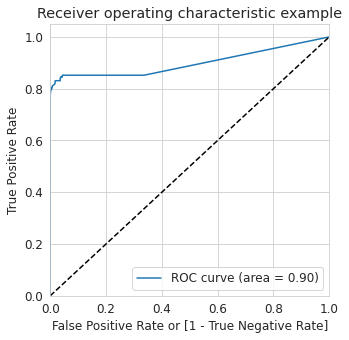

In [155]:
#getting the probability
y_test_pred_prob_dt_smote = dt_smote_model.predict_proba(X_test)[:,1]


#displaying  ROC-AUC score plot for the decision tree

draw_roc(y_test,y_test_pred_prob_dt_smote)

### Random Forest with SMOTE

In [156]:
# Random forest model
state=48
tuned_parameters = {'max_depth':[3,4,5,6,7,8,9,10],
                    'criterion':['gini','entropy'],
                    'min_samples_split':[2,3,5,7,9], 
                    'max_features':['auto','sqrt', 'log2'],
                    'min_samples_leaf':[1, 10, 25, 50, 75, 100],
                    'n_estimators':[10,20,30,40,50,60,80,100,500,],
                    'max_leaf_nodes':[None, 10, 25, 50, 100, 500]}
#specify model
model = RandomForestClassifier(random_state=state)
# used randomizedsearch cv to set the values
rsearch_cv_smote = RandomizedSearchCV(estimator=model, 
                                param_distributions=tuned_parameters, 
                                cv=3, scoring='roc_auc',
                                verbose=5,
                                n_jobs=-1,
                                random_state=state)
#fit the model to data
rsearch_cv_smote.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 20.1min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [157]:
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', rsearch_cv_smote.best_score_)
#print the optimum value of hyperparameters
# print CV_rfc.best_params_
print('Best hyperparameters: ', rsearch_cv_smote.best_params_)

Best ROC AUC score:  0.9986913913871791
Best hyperparameters:  {'n_estimators': 30, 'min_samples_split': 7, 'min_samples_leaf': 50, 'max_leaf_nodes': 500, 'max_features': 'auto', 'max_depth': 8, 'criterion': 'gini'}


#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [158]:
#applying the best parameters on train dataset
rfc_smote_model=RandomForestClassifier(random_state=48,
                           class_weight='balanced',
                           n_estimators=30,
                           min_samples_split= 7,
                           min_samples_leaf= 50,
                            max_leaf_nodes= 500,
                            max_features= 'auto',
                            max_depth= 8,
                            criterion= 'gini')
rfc_smote_model.fit(X_train_smote, y_train_smote)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=500, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=48, verbose=0,
                       warm_start=False)

##### Evaluating the model on train data

In [159]:
#predicting on train dataset
predictions_rfc_smote=rfc_smote_model.predict(X_train_smote)

In [160]:
#creating the confusion matrix
cm_train_rfc = metrics.confusion_matrix(y_train_smote, predictions_rfc_smote)
print("The confusion matrix is :", cm_train_rfc)
print()
print()

#Display f1 score and classification report of a model.
display_scores(y_train_smote, predictions_rfc_smote)

The confusion matrix is : [[198521    493]
 [  9211 189803]]


F1 Score: 97.51%
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98    199014
           1       1.00      0.95      0.98    199014

    accuracy                           0.98    398028
   macro avg       0.98      0.98      0.98    398028
weighted avg       0.98      0.98      0.98    398028



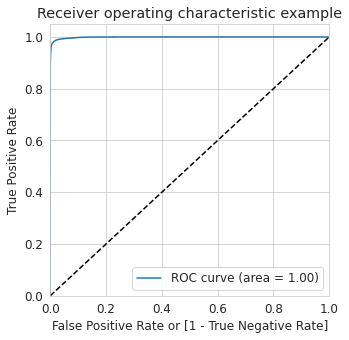

In [161]:
# Predicted probability
y_train_smote_pred_proba_rfc = rfc_smote_model.predict_proba(X_train_smote)[:,1]

# Plot the ROC curve
draw_roc(y_train_smote, y_train_smote_pred_proba_rfc)

##### Evaluating the model on test data

In [162]:
#predicting on test dataset
predictions_rfc_test=rfc_smote_model.predict(X_test)

In [163]:
#creating the confusion matrix
cm_test_rfc = metrics.confusion_matrix(y_test, predictions_rfc_test)
print("The confusion matrix is :", cm_test_rfc)
print()
print()

#Display f1 score and classification report of a model.
display_scores(y_test, predictions_rfc_test)

The confusion matrix is : [[85048   253]
 [   25   117]]


F1 Score: 45.7%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.32      0.82      0.46       142

    accuracy                           1.00     85443
   macro avg       0.66      0.91      0.73     85443
weighted avg       1.00      1.00      1.00     85443



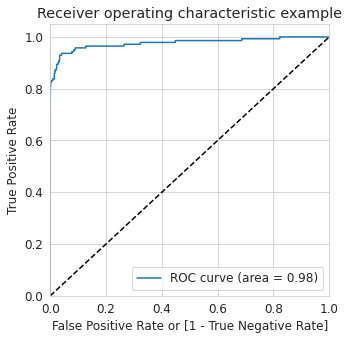

In [164]:
# Predicted probability
y_test_smote_pred_proba_rfc = rfc_smote_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_smote_pred_proba_rfc)

### XGBoost with SMOTE

In [165]:
# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv_smote = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv_smote.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed: 24.3min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=2, min_child_weight=1,
                                     missing=None, n_estimators=200, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_scor

In [166]:
# cv results
cv_results = pd.DataFrame(model_cv_smote.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,66.364652,0.218137,0.678056,0.007588,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.999700,0.999785,0.999730,0.999738,0.000035,4,0.999789,0.999764,0.999779,0.999778,0.000010
1,82.054880,0.078611,0.677119,0.005362,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.999693,0.999781,0.999702,0.999726,0.000040,5,0.999785,0.999755,0.999765,0.999768,0.000012
2,88.494581,0.170757,0.676984,0.005515,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.999694,0.999761,0.999696,0.999717,0.000031,6,0.999779,0.999740,0.999748,0.999756,0.000017
3,65.568615,0.107949,0.683988,0.004757,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.999942,0.999964,0.999961,0.999956,0.000010,3,0.999984,0.999980,0.999987,0.999984,0.000003
4,81.952056,0.118077,0.694995,0.007078,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.999956,0.999970,0.999958,0.999962,0.000006,2,0.999990,0.999990,0.999988,0.999989,0.000001
5,88.511441,0.178010,0.683676,0.003427,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.999953,0.999976,0.999960,0.999963,0.000009,1,0.999988,0.999985,0.999986,0.999986,0.000001


In [167]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_cv_smote.best_score_)
print(model_cv_smote.best_estimator_)

Best roc auc score :  0.9999631656965219
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.6, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.9, verbosity=1)


#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [168]:
#applying the best parameters on train dataset
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
          'objective':'binary:logistic'}

# fit model on training data
xgb_smote_model = XGBClassifier(params = params)

# fit the model
xgb_smote_model.fit(X_train_smote,y_train_smote)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic',
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

##### Evaluating the model on train data

In [169]:
#predicting on train dataset
predict_xg_smote=xgb_smote_model.predict(X_train_smote)

In [170]:
#creating the confusion matrix
xg_train_cm = metrics.confusion_matrix(y_train_smote, predict_xg_smote)
print("The confusion matrix is :", xg_train_cm)
print()
print()

#Display f1 score and classification report of a model.
display_scores(y_train_smote, predict_xg_smote)

The confusion matrix is : [[197299   1715]
 [  4335 194679]]


F1 Score: 98.47%
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98    199014
           1       0.99      0.98      0.98    199014

    accuracy                           0.98    398028
   macro avg       0.98      0.98      0.98    398028
weighted avg       0.98      0.98      0.98    398028



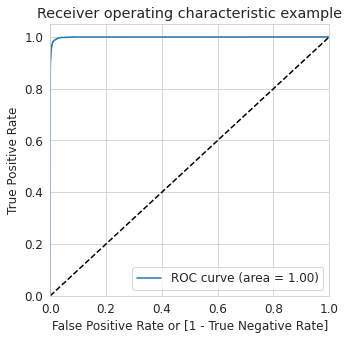

In [171]:
# Predicted probability
y_sm_train_pred_proba_xg = xgb_smote_model.predict_proba(X_train_smote)[:,1]

# Plot the ROC curve
draw_roc(y_train_smote, y_sm_train_pred_proba_xg)

##### Evaluating the model on test data

In [172]:
#predicting on test dataset
predict_xg_smote_test=xgb_smote_model.predict(X_test.values)

In [173]:
#creating the confusion matrix
xg_test_cm = metrics.confusion_matrix(y_test, predict_xg_smote_test)
print("The confusion matrix is :", xg_test_cm)
print()
print()

#Display f1 score and classification report of a model.
display_scores(y_test, predict_xg_smote_test)

The confusion matrix is : [[84485   816]
 [   22   120]]


F1 Score: 22.26%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     85301
           1       0.13      0.85      0.22       142

    accuracy                           0.99     85443
   macro avg       0.56      0.92      0.61     85443
weighted avg       1.00      0.99      0.99     85443



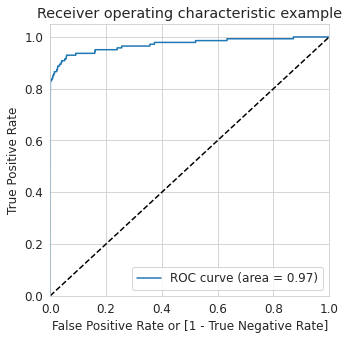

In [174]:
# Predicted probability
y_sm_test_pred_proba_xg = xgb_smote_model.predict_proba(X_test.values)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_sm_test_pred_proba_xg)

### ADASYN (Adaptive Synthetic Sampling)

ADASYN (Adaptive Synthetic) is an algorithm that generates synthetic data, and its greatest advantages are not copying the same minority data, and generating more data for “harder to learn” examples

### Print the class distribution after applying ADASYN

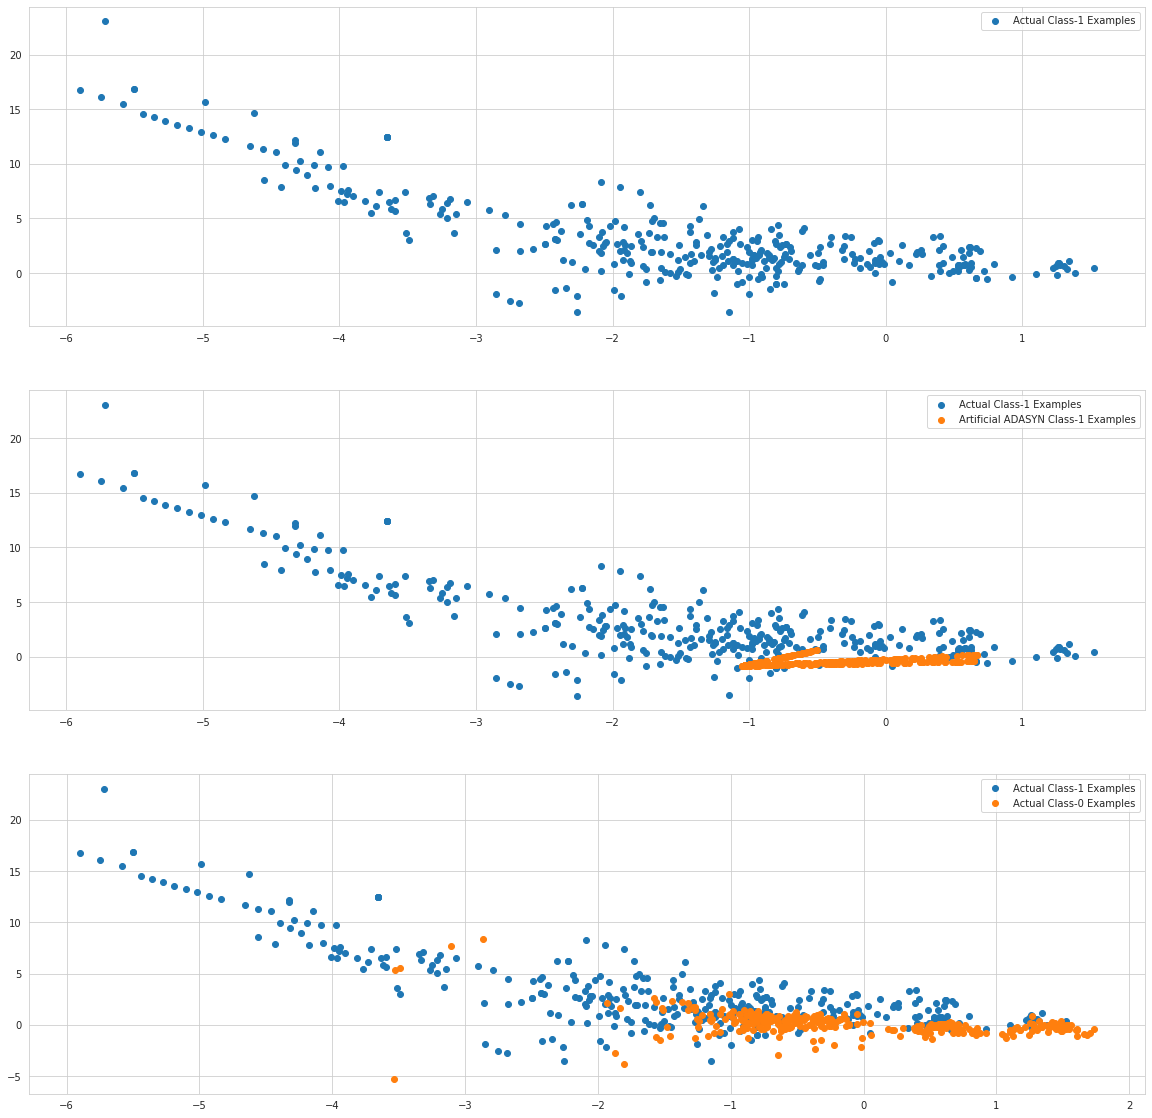

In [175]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

### Logistic Regression with ADASYN

In [176]:
# Creating KFold object with 3 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  1.3min finished


Best ROC AUC score:  0.966583451672151
Best hyperparameters:  {'C': 1000}


In [177]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.179777,0.117073,0.039838,0.000416,0.01,{'C': 0.01},0.966335,0.967097,0.966567,0.966038,0.966644,0.966536,0.000351,6,0.966619,0.966229,0.966547,0.966782,0.966635,0.966562,0.000183
1,2.339147,0.050703,0.040361,0.001477,0.1,{'C': 0.1},0.966375,0.967126,0.966628,0.966079,0.966697,0.966581,0.000349,5,0.966666,0.966273,0.966605,0.966818,0.966679,0.966608,0.000182
2,2.381603,0.039039,0.039513,0.000517,1,{'C': 1},0.966377,0.967129,0.966632,0.966079,0.966700,0.966583,0.000349,4,0.966669,0.966275,0.966608,0.966818,0.966682,0.966610,0.000181
3,2.371680,0.086416,0.040550,0.001550,10,{'C': 10},0.966377,0.967129,0.966632,0.966079,0.966700,0.966583,0.000350,3,0.966669,0.966275,0.966608,0.966818,0.966682,0.966610,0.000181
4,2.357450,0.067905,0.040767,0.002062,100,{'C': 100},0.966377,0.967130,0.966632,0.966079,0.966700,0.966583,0.000350,2,0.966669,0.966275,0.966608,0.966818,0.966682,0.966610,0.000181
5,2.368097,0.064776,0.040784,0.001098,1000,{'C': 1000},0.966377,0.967130,0.966632,0.966079,0.966700,0.966583,0.000350,1,0.966669,0.966275,0.966608,0.966818,0.966682,0.966610,0.000181


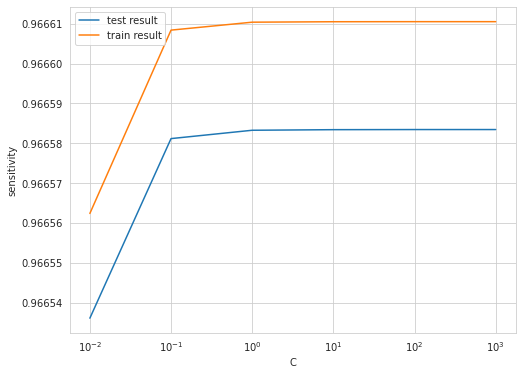

In [178]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [179]:
# Instantiating the model
logreg_adasyn_model = LogisticRegression(C=1000)

# Fitting the model 
logreg_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

##### Evaluating the model on train data

In [180]:
# Predictions on the train set
y_adasyn_pred_lr = logreg_adasyn_model.predict(X_train_adasyn)

In [181]:
#creating the confusion matrix
adasyn_trainlr = metrics.confusion_matrix(y_train_adasyn, y_adasyn_pred_lr)
adasyn_trainlr

array([[181187,  17827],
       [ 27510, 171507]])

In [182]:
# Display f1 score and classification report of a model.
display_scores(y_train_adasyn, y_adasyn_pred_lr)

F1 Score: 88.33%
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.91      0.89    199014
           1       0.91      0.86      0.88    199017

    accuracy                           0.89    398031
   macro avg       0.89      0.89      0.89    398031
weighted avg       0.89      0.89      0.89    398031



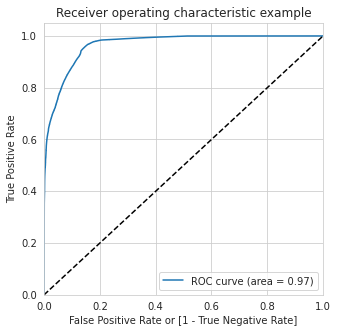

In [183]:
#getting the probability
y_adasyn_pred_proba_lr = logreg_adasyn_model.predict_proba(X_train_adasyn)[:,1]

#plotting roc-auc curve 
draw_roc(y_train_adasyn,y_adasyn_pred_proba_lr)

##### Evaluating on test data

In [184]:
# Predictions on the test set
y_adasyn_pred_test_lr = logreg_adasyn_model.predict(X_test)

In [185]:
#creating the confusion matrix
cm_adasyn_testlr = metrics.confusion_matrix(y_test, y_adasyn_pred_test_lr)
cm_adasyn_testlr

array([[77480,  7821],
       [    8,   134]])

In [186]:
# Display f1 score and classification report of a model.
display_scores(y_test, y_adasyn_pred_test_lr)

F1 Score: 3.31%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.91      0.95     85301
           1       0.02      0.94      0.03       142

    accuracy                           0.91     85443
   macro avg       0.51      0.93      0.49     85443
weighted avg       1.00      0.91      0.95     85443



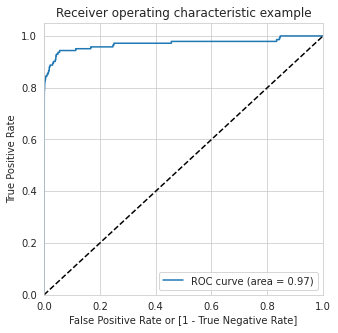

In [187]:
#getting the probability
ytest_adasyn_pred_proba_lr = logreg_adasyn_model.predict_proba(X_test)[:,1]

#plotting roc-auc curve 
draw_roc(y_test,ytest_adasyn_pred_proba_lr)

##### Build models on other algorithms to see the better performing on ADASYN

### Decision Tree with ADASYN

In [188]:
# Create the parameter grid 
param_dt = { 'criterion':['gini','entropy'],'max_depth': np.arange(5, 15,5),
    'min_samples_leaf': range(20, 150, 50),
    'min_samples_split': range(20, 150, 50),}
# decision tree model
dtree_model=DecisionTreeClassifier()
#use gridsearch to test all values
dt_gscv_adasyn = GridSearchCV(dtree_model,
                        param_grid = param_dt, 
                        scoring= 'roc_auc', 
                        cv = 5, 
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True) 
#fit model to data
dt_gscv_adasyn.fit(X_train_adasyn, y_train_adasyn)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 30.0min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [189]:
# Printing the optimal roc score and hyperparameters
print("Best roc auc score : ", dt_gscv_adasyn.best_score_)
print(dt_gscv_adasyn.best_params_)

Best roc auc score :  0.9572379837263618
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 120, 'min_samples_split': 20}


#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [190]:
# Model with optimal hyperparameters
dt_adasyn_model = DecisionTreeClassifier(criterion = "entropy", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=120,
                                  min_samples_split=20)
#fit model to train dataset
dt_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=120, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

##### Evaluating the model on train data

In [191]:
# Predictions on the train set
y_train_adasyn_pred = dt_adasyn_model.predict(X_train_adasyn)

#creating the confusion matrix
cm_adasyn_train_dtree = metrics.confusion_matrix(y_train_adasyn, y_train_adasyn_pred)
print("The confusion matrix is :", cm_adasyn_train_dtree)
print()
print()

#Display f1 score and classification report of a model.
display_scores(y_train_adasyn, y_train_adasyn_pred)

The confusion matrix is : [[192854   6160]
 [  9333 189684]]


F1 Score: 96.08%
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96    199014
           1       0.97      0.95      0.96    199017

    accuracy                           0.96    398031
   macro avg       0.96      0.96      0.96    398031
weighted avg       0.96      0.96      0.96    398031



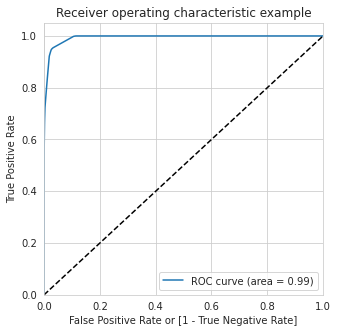

In [192]:
# Predicted probability
y_train_pred_proba = dt_adasyn_model.predict_proba(X_train_adasyn)[:,1]
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

##### Evaluating the model on test data

In [193]:
# Predictions on the train set
y_test_adasyn_pred = dt_adasyn_model.predict(X_test)

#creating the confusion matrix
cm_test_dtree_adsn = metrics.confusion_matrix(y_test, y_test_adasyn_pred)
print("The confusion matrix is :", cm_test_dtree_adsn)
print()
print()

# Display f1 score and classification report of a model.
display_scores(y_test, y_test_adasyn_pred)

The confusion matrix is : [[82487  2814]
 [   23   119]]


F1 Score: 7.74%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.98     85301
           1       0.04      0.84      0.08       142

    accuracy                           0.97     85443
   macro avg       0.52      0.90      0.53     85443
weighted avg       1.00      0.97      0.98     85443



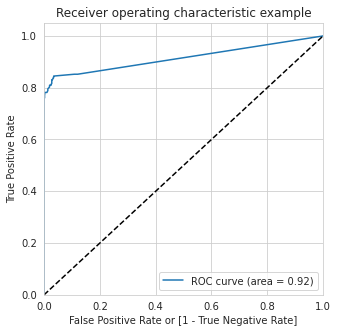

In [194]:
# Predicted probability
y_test_pred_proba = dt_adasyn_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

### Random Forest with ADASYN

In [195]:
state=48
tuned_parameters = {'max_depth':[3,4,5,6,7,8,9,10],
                    'criterion':['gini','entropy'],
                    'min_samples_split':[2,3,5,7,9], 
                    'max_features':['auto','sqrt', 'log2'],
                    'min_samples_leaf':[1, 10, 25, 50, 75, 100],
                    'n_estimators':[10,20,30,40,50,60,80,100,500,],
                    'max_leaf_nodes':[None, 10, 25, 50, 100, 500]}
# specify model
model = RandomForestClassifier(random_state=state)
# setup randomisedsearchCV
rsearch_cv_adasyn = RandomizedSearchCV(estimator=model, 
                                param_distributions=tuned_parameters, 
                                cv=3, scoring='roc_auc',
                                verbose=5,
                                n_jobs=-1,
                                random_state=state)
# fit the model
rsearch_cv_adasyn.fit(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 19.7min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [196]:
#evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', rsearch_cv_adasyn.best_score_)
#print the optimum value of hyperparameters
# print CV_rfc.best_params_
print('Best hyperparameters: ', rsearch_cv_adasyn.best_params_)

Best ROC AUC score:  0.9785184154568739
Best hyperparameters:  {'n_estimators': 30, 'min_samples_split': 7, 'min_samples_leaf': 50, 'max_leaf_nodes': 500, 'max_features': 'auto', 'max_depth': 8, 'criterion': 'gini'}


#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [197]:
#applying the optimal hyoerparameters on train dataset
rfc_adasyn_model=RandomForestClassifier(random_state=48,
                           class_weight='balanced',
                           n_estimators=30,
                           min_samples_split= 7,
                           min_samples_leaf= 50,
                            max_leaf_nodes= 500,
                            max_features= 'auto',
                            max_depth= 8,
                            criterion= 'gini')
rfc_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=500, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=48, verbose=0,
                       warm_start=False)

##### Evaluating the model on train data

In [198]:
#predicting on train dataset
y_train_adasyn_pred=rfc_adasyn_model.predict(X_train_adasyn)

In [199]:
#creating the confusion matrix
cm_train_rfc = metrics.confusion_matrix(y_train_adasyn, y_train_adasyn_pred)
print("The confusion matrix is :", cm_train_rfc)
print()
print()

#Display f1 score and classification report of a model.
display_scores(y_train_adasyn, y_train_adasyn_pred)

The confusion matrix is : [[195282   3732]
 [  4727 194290]]


F1 Score: 97.87%
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98    199014
           1       0.98      0.98      0.98    199017

    accuracy                           0.98    398031
   macro avg       0.98      0.98      0.98    398031
weighted avg       0.98      0.98      0.98    398031



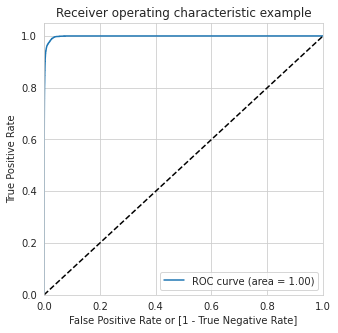

In [200]:
# predicted probability
y_train_pred_proba = rfc_adasyn_model.predict_proba(X_train_adasyn)[:,1]

# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

##### Evaluating the model on test data

In [201]:
#predicting on train dataset
y_test_adasyn_pred=rfc_adasyn_model.predict(X_test)

In [202]:
#creating the confusion matrix
cm_test_rfc = metrics.confusion_matrix(y_test, y_test_adasyn_pred)
print("The confusion matrix is :", cm_test_rfc)
print()
print()

#Display f1 score and classification report of a model.
display_scores(y_test, y_test_adasyn_pred)

The confusion matrix is : [[83622  1679]
 [   21   121]]


F1 Score: 12.46%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     85301
           1       0.07      0.85      0.12       142

    accuracy                           0.98     85443
   macro avg       0.53      0.92      0.56     85443
weighted avg       1.00      0.98      0.99     85443



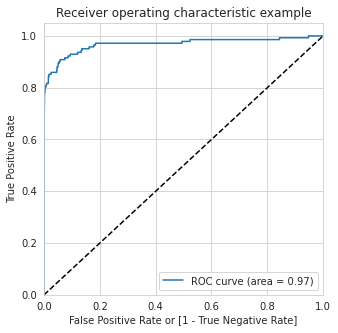

In [203]:
# predicted probability
y_test_pred_proba = rfc_adasyn_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

### XGBoost with ADASYN

In [204]:
# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
xg_grcv_adasyn = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
xg_grcv_adasyn.fit(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed: 23.7min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=2, min_child_weight=1,
                                     missing=None, n_estimators=200, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_scor

In [205]:
# cv results
cv_results = pd.DataFrame(xg_grcv_adasyn.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,63.268975,0.084549,0.684926,0.007512,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.986807,0.993605,0.982881,0.987764,0.004430,6,0.999448,0.999445,0.999419,0.999437,0.000013
1,80.814513,0.300498,0.678072,0.005124,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.990029,0.993378,0.984610,0.989339,0.003613,4,0.999466,0.999419,0.999430,0.999438,0.000020
2,87.685649,0.943350,0.678610,0.003173,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.988813,0.992743,0.983354,0.988303,0.003850,5,0.999464,0.999331,0.999351,0.999382,0.000059
3,63.349716,0.060740,0.688593,0.006437,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.988825,0.998665,0.991049,0.992847,0.004213,1,0.999944,0.999962,0.999960,0.999955,0.000008
4,80.744833,0.736349,0.683701,0.006172,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.985484,0.999046,0.987523,0.990684,0.005971,3,0.999971,0.999977,0.999966,0.999971,0.000004
5,86.648454,0.113861,0.681737,0.005446,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.987259,0.998488,0.988740,0.991496,0.004981,2,0.999966,0.999971,0.999968,0.999968,0.000002


#### Proceed with the model which shows the best result 
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [206]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", xg_grcv_adasyn.best_score_)
print(xg_grcv_adasyn.best_estimator_)

Best roc auc score :  0.9928465759747311
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.6, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.3, verbosity=1)


In [207]:
# applying the best hyperparameters
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.3,
          'objective':'binary:logistic'}

# fit Model with optimal hyperparameter on train data
xgb_adasyn_model = XGBClassifier(params = params)
xgb_adasyn_model.fit(X_train_adasyn,y_train_adasyn)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic',
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.3},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

##### Evaluating the model on train data

In [208]:
# Predicting on the train set
y_train_adasyn_pred_xg = xgb_adasyn_model.predict(X_train_adasyn)

In [209]:
#creating the confusion matrix
xg_train_cm = metrics.confusion_matrix(y_train_adasyn, y_train_adasyn_pred_xg)
print("The confusion matrix is :", xg_train_cm)
print()
print()

#Display f1 score and classification report of a model
display_scores(y_train_adasyn, y_train_adasyn_pred_xg)

The confusion matrix is : [[192938   6076]
 [  2286 196731]]


F1 Score: 97.92%
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98    199014
           1       0.97      0.99      0.98    199017

    accuracy                           0.98    398031
   macro avg       0.98      0.98      0.98    398031
weighted avg       0.98      0.98      0.98    398031



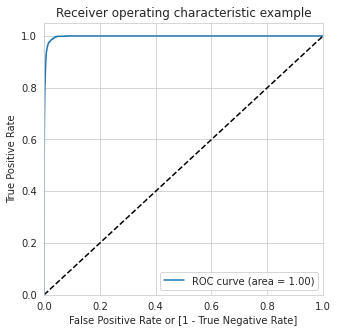

In [210]:
# Predicted probability
y_train_pred_proba_xg = xgb_adasyn_model.predict_proba(X_train_adasyn)[:,1]
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba_xg)

##### Evaluating the model on test data

In [211]:
#predicting on test dataset
y_test_adasyn_pred_xg = xgb_adasyn_model.predict(X_test.values)

In [212]:
#creating the confusion matrix
xg_test_cm = metrics.confusion_matrix(y_test, y_test_adasyn_pred_xg)
print("The confusion matrix is :", xg_test_cm)
print()
print()

#Display f1 score and classification report of a model.
display_scores(y_test, y_test_adasyn_pred_xg)

The confusion matrix is : [[82563  2738]
 [   17   125]]


F1 Score: 8.32%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.98     85301
           1       0.04      0.88      0.08       142

    accuracy                           0.97     85443
   macro avg       0.52      0.92      0.53     85443
weighted avg       1.00      0.97      0.98     85443



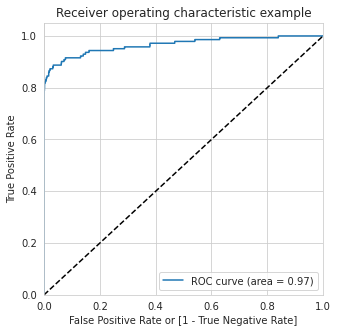

In [213]:
# Predicted probability
y_test_pred_proba_xg = xgb_adasyn_model.predict_proba(X_test.values)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba_xg)

### Print the important features of the best model to understand the dataset

Top var = 14
2nd Top var = 4
3rd Top var = 8


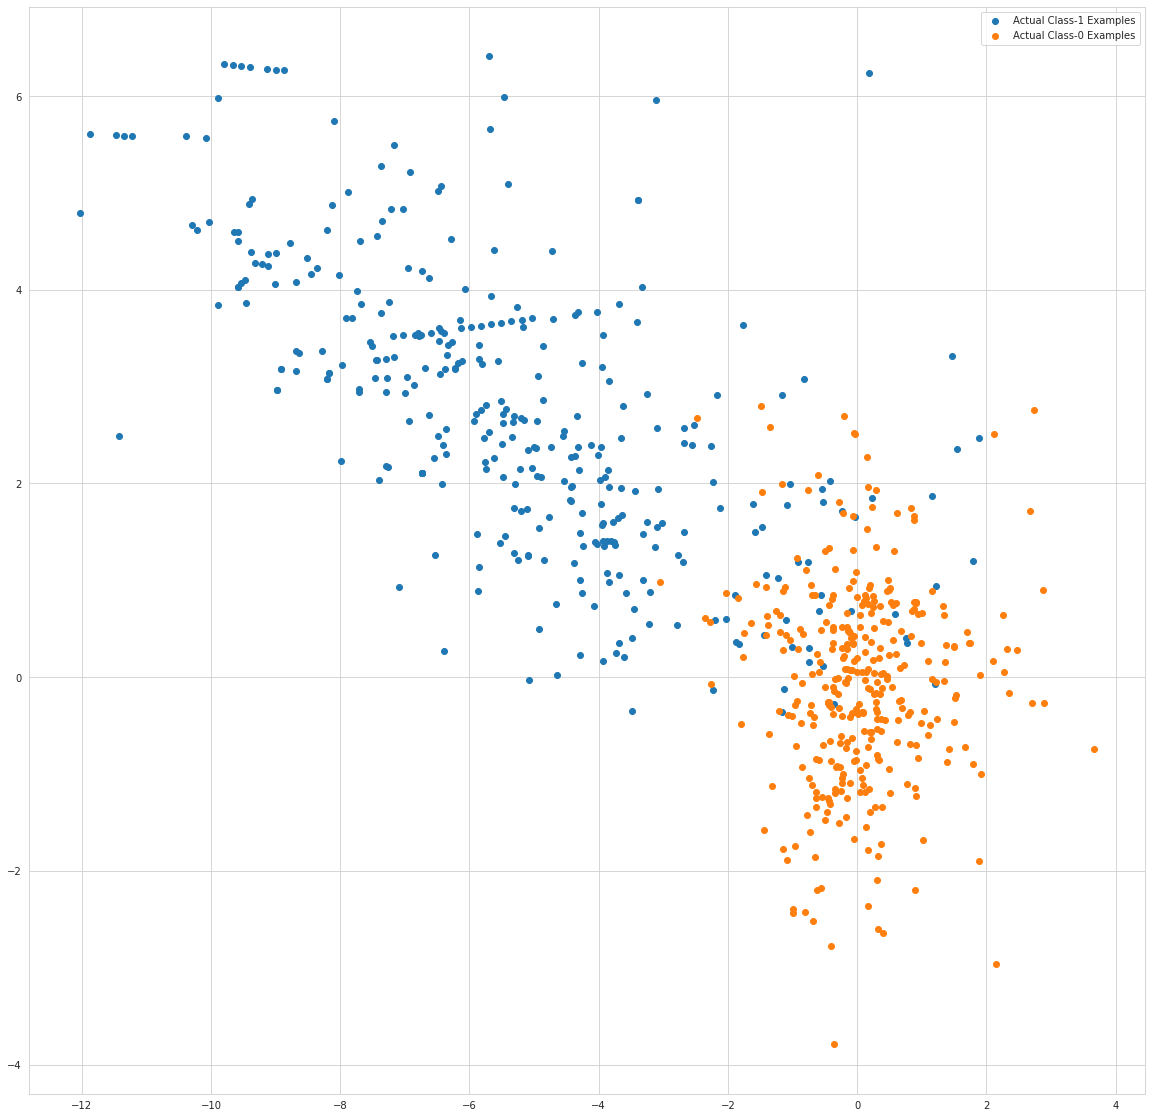

In [214]:
var_imp = []
for i in xgb_adasyn_model.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

### Print the FPR,TPR & select the best threshold from the roc curve

In [215]:
#### Print the FPR,TPR & select the best threshold from the roc curve
### XGBoost 
print("XGBoosting train  Auc ")
print('Train auc =', metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba_xg))
fpr, tpr, thresholds = metrics.roc_curve(y_train_adasyn, y_train_pred_proba_xg)
threshold = thresholds[np.argmax(tpr-fpr)]
print("the threhold is :", threshold)
print("")
print("")

# XGboost
print("XGBoosting test Auc ")
print('Test auc =', metrics.roc_auc_score(y_test, y_test_pred_proba_xg))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred_proba_xg)
threshold = thresholds[np.argmax(tpr-fpr)]
print("The threshold is :" , threshold)

XGBoosting train  Auc 
Train auc = 0.9975905627355857
the threhold is : 0.54488033


XGBoosting test Auc 
Test auc = 0.9660939281956141
The threshold is : 0.4916017


## Final Inferences

To predict the fraudualent transactions we created about 5 predictive models as mentioned below -

- Logistic Regression Model.
- K-Nearest Neighbor (KNN)
- Decision Tree Classifier.
- Random Forest Classifier.
- Extreme Gradient Boosting with XGBoost

The above models were initially created with default parameters which did not give accurate results and the score metrics were not very good. Then we hypertuned each model and recreated them with the best estimators. The hyper tuned model showed an increase in the classification scores though marginally.

We then performed our analysis by using different balancing techniques

1. Random oversampling
2. Smote
3. Adasyn

Each of the above models were assessed on Accuracy, precision, recall, F1 score

Out of all the above models, Extreme Gradient Boosting with XGBoost with ADASYN Technique came out as the winner giving the best metrics of scores.



ADASYN technique XGBoost model has good ROC score (99%).Although tuning is required .Hence, we can go with the XGBoost model here.